# <center>IPL Data Analysis</center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
matches=pd.read_csv("matches.csv")

In [3]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

In [5]:
matches.drop("umpire3",axis=1,inplace=True)

In [6]:
matches.rename(columns={'id': 'match_id'}, inplace=True)

In [7]:
matches["date"]=pd.to_datetime(matches["date"])

In [8]:
matches.date.dtype

dtype('<M8[ns]')

In [9]:
matches.describe()

,match_id,season,date,dl_applied,win_by_runs,win_by_wickets
count,636.000000,636.000000,636,636.000000,636.000000,636.000000
mean,318.500000,2012.490566,2012-10-24 20:52:04.528302080,0.025157,13.682390,3.372642
min,1.000000,2008.000000,2008-04-18 00:00:00,0.000000,0.000000,0.000000
25%,159.750000,2010.000000,2010-04-11 00:00:00,0.000000,0.000000,0.000000
50%,318.500000,2012.000000,2012-05-21 00:00:00,0.000000,0.000000,4.000000
75%,477.250000,2015.000000,2015-04-22 00:00:00,0.000000,20.000000,7.000000
max,636.000000,2017.000000,2017-05-21 00:00:00,1.000000,146.000000,10.000000
std,183.741666,2.773026,NaN,0.156726,23.908877,3.420338


In [10]:
deliveries=pd.read_csv("deliveries.csv")

In [11]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [12]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          150460 non-null  int64 
 1   inning            150460 non-null  int64 
 2   batting_team      150460 non-null  object
 3   bowling_team      150460 non-null  object
 4   over              150460 non-null  int64 
 5   ball              150460 non-null  int64 
 6   batsman           150460 non-null  object
 7   non_striker       150460 non-null  object
 8   bowler            150460 non-null  object
 9   is_super_over     150460 non-null  int64 
 10  wide_runs         150460 non-null  int64 
 11  bye_runs          150460 non-null  int64 
 12  legbye_runs       150460 non-null  int64 
 13  noball_runs       150460 non-null  int64 
 14  penalty_runs      150460 non-null  int64 
 15  batsman_runs      150460 non-null  int64 
 16  extra_runs        150460 non-null  int

In [13]:
deliveries.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000
mean,318.281317,1.482188,10.142649,3.616483,0.000538,0.037498,0.004885,0.022232,0.004340,0.000066,1.222445,0.069022,1.291466
std,182.955531,0.501768,5.674338,1.807698,0.023196,0.257398,0.114234,0.200104,0.072652,0.018229,1.594509,0.349667,1.583240
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,161.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,319.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,476.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,636.000000,4.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,6.000000,7.000000,7.000000


In [14]:
deliveries.shape

(150460, 21)

In [15]:
df=pd.merge(deliveries, matches, on='match_id', how='inner')

In [16]:
df.shape

(150460, 37)

In [17]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong


In [18]:
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder', 'season', 'city', 'date', 'team1', 'team2',
       'toss_winner', 'toss_decision', 'result', 'dl_applied', 'winner',
       'win_by_runs', 'win_by_wickets', 'player_of_match', 'venue', 'umpire1',
       'umpire2'],
      dtype='object')

## 1. How are total runs distributed per over across all matches? Are there specific overs with higher or lower scoring tendencies?

In [20]:
runs_per_over = df.groupby('over')['total_runs'].sum().reset_index()

In [21]:
runs_per_over

,over,total_runs
0,1,7733
1,2,8993
2,3,9852
3,4,10207
4,5,10227
5,6,10397
6,7,8413
7,8,8966
8,9,9247
9,10,9047


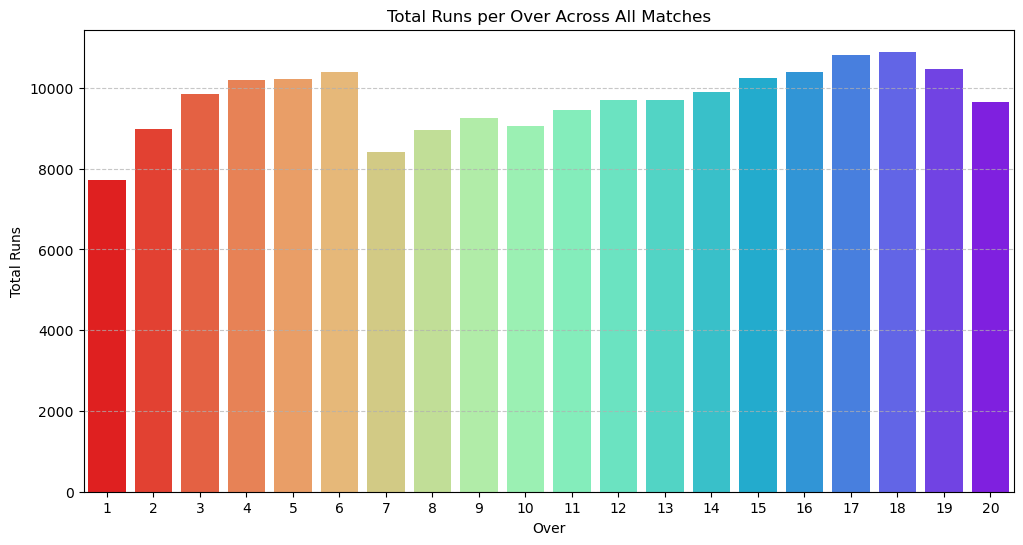

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(x='over', y='total_runs', data=runs_per_over, palette='rainbow_r',hue="over",legend=False)
plt.title('Total Runs per Over Across All Matches')
plt.xlabel('Over')
plt.ylabel('Total Runs')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Insights:
Powerplay Overs (1-6): These overs have high flow of runs because of field restrictions as only 2 fielders are allowed outside the 30 yard circle
                       
Middle Overs (7-15): The scoring rate might stabilize as batsmen settle in.

Death Overs (16-20): These overs often see a spike in average runs as batsmen aim to maximize the score.

## 2. How frequently do different batting teams hit boundaries (fours and sixes)? Do some teams rely more heavily on boundaries for scoring?

In [23]:
boundaries = df[df['batsman_runs'].isin([4, 6])]

In [24]:
boundaries[['batsman_runs']].head()

,batsman_runs
2,4
8,4
10,6
13,4
30,4


In [25]:
boundary_counts = boundaries.groupby(['batting_team', 'batsman_runs']).size().unstack(fill_value=0)
boundary_counts.columns = ['Fours', 'Sixes']

In [26]:
boundary_counts

,Fours,Sixes
batting_team,,
Chennai Super Kings,1770,742
Deccan Chargers,957,400
Delhi Daredevils,1970,686
Gujarat Lions,460,155
Kings XI Punjab,2083,762
Kochi Tuskers Kerala,170,53
Kolkata Knight Riders,1978,659
Mumbai Indians,2145,876
Pune Warriors,525,196


In [27]:
boundary_counts['Total Boundary Runs'] = boundary_counts['Fours'] * 4 + boundary_counts['Sixes'] * 6

In [28]:
total_runs = df.groupby('batting_team')['total_runs'].sum()

In [29]:
boundary_counts['Boundary Run Percentage'] = round((boundary_counts['Total Boundary Runs'] / total_runs) * 100,2)

In [30]:
boundary_counts

,Fours,Sixes,Total Boundary Runs,Boundary Run Percentage
batting_team,,,,
Chennai Super Kings,1770,742,11532,55.18
Deccan Chargers,957,400,6228,54.33
Delhi Daredevils,1970,686,11996,54.64
Gujarat Lions,460,155,2770,56.97
Kings XI Punjab,2083,762,12904,55.94
Kochi Tuskers Kerala,170,53,998,52.50
Kolkata Knight Riders,1978,659,11866,54.02
Mumbai Indians,2145,876,13836,56.43
Pune Warriors,525,196,3276,51.53


In [31]:
boundary_counts.reset_index(inplace=True)

In [32]:
boundary_counts

,batting_team,Fours,Sixes,Total Boundary Runs,Boundary Run Percentage
0,Chennai Super Kings,1770,742,11532,55.18
1,Deccan Chargers,957,400,6228,54.33
2,Delhi Daredevils,1970,686,11996,54.64
3,Gujarat Lions,460,155,2770,56.97
4,Kings XI Punjab,2083,762,12904,55.94
5,Kochi Tuskers Kerala,170,53,998,52.50
6,Kolkata Knight Riders,1978,659,11866,54.02
7,Mumbai Indians,2145,876,13836,56.43
8,Pune Warriors,525,196,3276,51.53
9,Rajasthan Royals,1630,538,9748,55.06


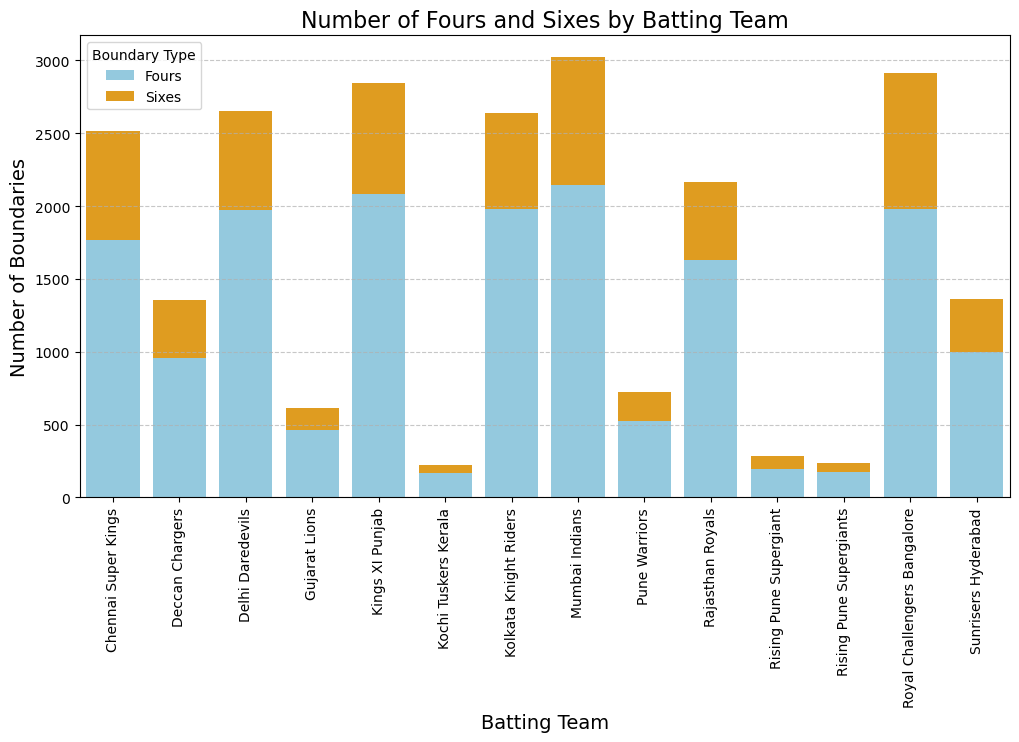

In [33]:
plt.figure(figsize=(12, 6))
sns.barplot(data=boundary_counts, x='batting_team', y='Fours', color='skyblue', label='Fours')
sns.barplot(data=boundary_counts, x='batting_team', y='Sixes', color='orange', label='Sixes', bottom=boundary_counts['Fours'])
plt.title('Number of Fours and Sixes by Batting Team', fontsize=16)
plt.xlabel('Batting Team', fontsize=14)
plt.ylabel('Number of Boundaries', fontsize=14)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Boundary Type')
plt.show()

### Insights:
The most number of boundaries scored by top 3 teams are:
1. Mumbai Indian
2. Royal Challenngers Banglore
3. Mumbai Indians

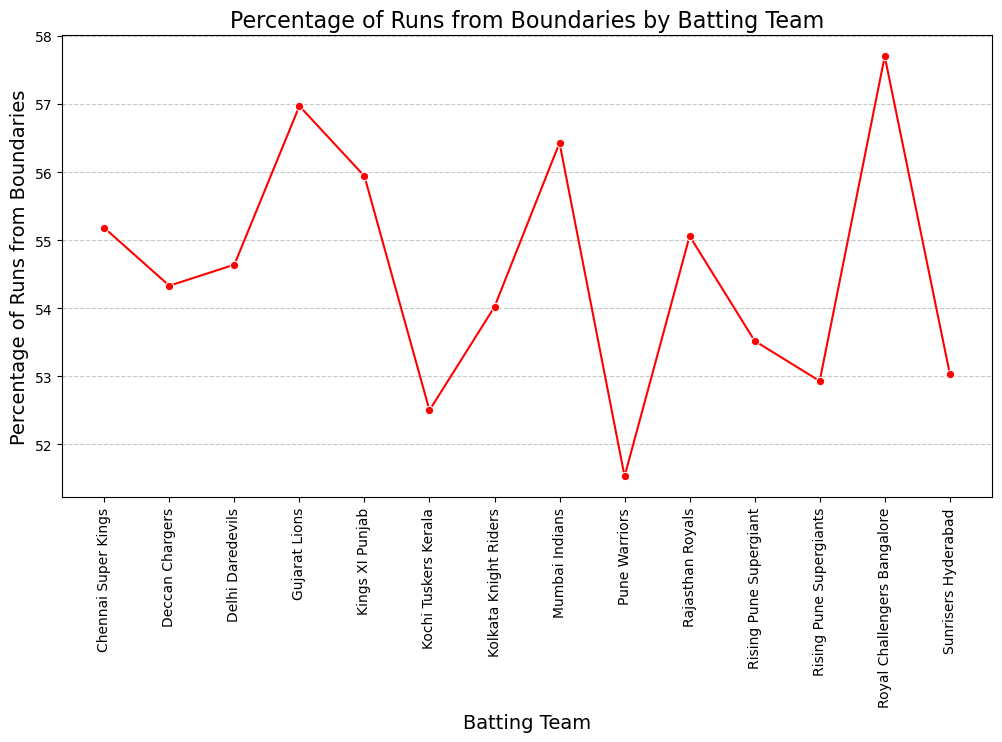

In [34]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=boundary_counts, x='batting_team', y='Boundary Run Percentage',marker='o',color='red')
plt.title('Percentage of Runs from Boundaries by Batting Team', fontsize=16)
plt.xlabel('Batting Team', fontsize=14)
plt.ylabel('Percentage of Runs from Boundaries', fontsize=14)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Insights:
The team which is mostly dependent on boundaries id <b>Royal Challengers Banglore</b> which scored <b>58%</b> of its total runs fom boundaries

## 3. Is there a difference in the distribution and types of extra runs conceded by various bowling teams?

In [35]:
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder', 'season', 'city', 'date', 'team1', 'team2',
       'toss_winner', 'toss_decision', 'result', 'dl_applied', 'winner',
       'win_by_runs', 'win_by_wickets', 'player_of_match', 'venue', 'umpire1',
       'umpire2'],
      dtype='object')

In [36]:
extra_runs_by_team = df.groupby('bowling_team')[['wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs']].sum()

In [37]:
extra_runs_by_team.rename(columns = {'wide_runs':'Wide','bye_runs':'Byes','legbye_runs':'Legbyes','penalty_runs':'Penalty'},inplace=True)

In [38]:
extra_runs_by_team

,Wide,Byes,Legbyes,noball_runs,Penalty
bowling_team,,,,,
Chennai Super Kings,526,59,361,56,0
Deccan Chargers,328,62,215,49,5
Delhi Daredevils,614,76,409,88,0
Gujarat Lions,107,10,64,7,0
Kings XI Punjab,668,83,392,87,0
Kochi Tuskers Kerala,56,5,41,8,0
Kolkata Knight Riders,658,98,382,66,0
Mumbai Indians,786,96,414,96,5
Pune Warriors,174,38,97,26,0


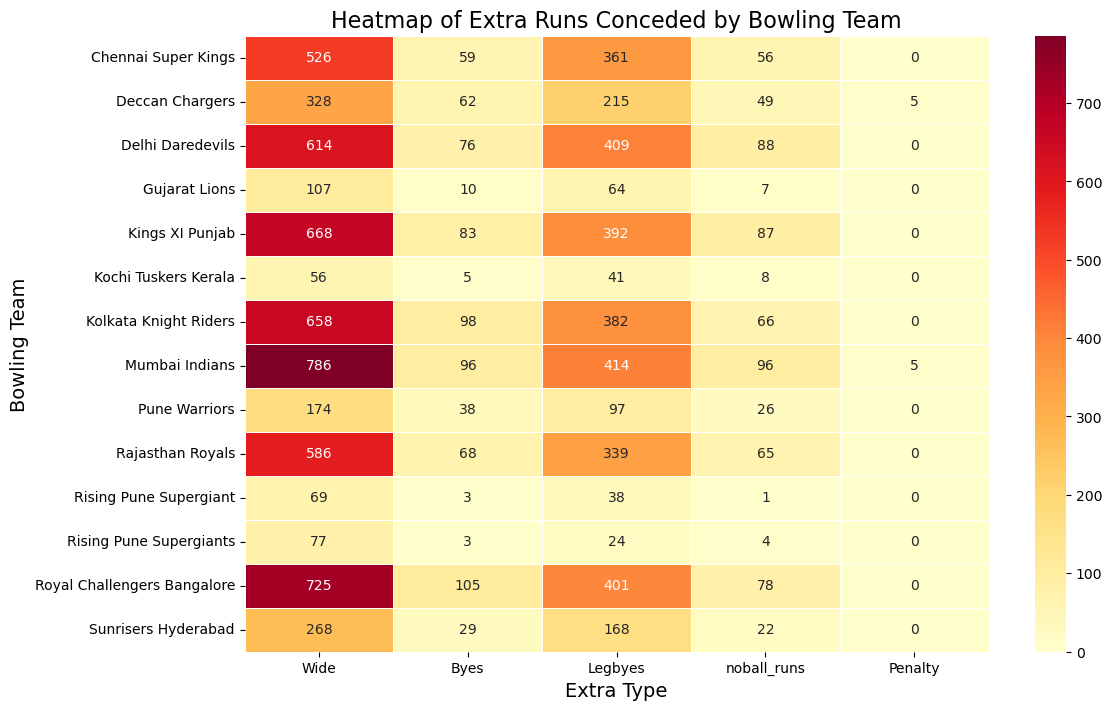

In [39]:
plt.figure(figsize=(12, 8))
sns.heatmap(extra_runs_by_team, annot=True, fmt='d', cmap='YlOrRd', linewidths=0.5)
plt.title('Heatmap of Extra Runs Conceded by Bowling Team', fontsize=16)
plt.xlabel('Extra Type', fontsize=14)
plt.ylabel('Bowling Team', fontsize=14)
plt.xticks(rotation=0)
plt.show()

### Insights:
Teams which play on flat tracks like Delhi Dare Devils,Kings XI Punjab,Kolkata knight Riders, Mumbai Indians, Royal Challengers Banglore 
have conceded more extra runs compared to other teams

Teams which have good bowling lineups like Sunrisers Hyderabad and Chennai Super Kings have conceded low extra runs

## 4. How do run rates change across different phases of the innings (e.g., powerplay, middle overs, death overs) for different teams?

In [40]:
def get_phase(over):
    if over <= 6:
        return 'Powerplay'
    elif 7 <= over <= 15:
        return 'Middle Overs'
    else:
        return 'Death Overs'

In [41]:
df['phase'] = df['over'].apply(get_phase)

In [42]:
df['phase'].head()

0    Powerplay
1    Powerplay
2    Powerplay
3    Powerplay
4    Powerplay
Name: phase, dtype: object

In [43]:
phase_stats = df.groupby(['batting_team', 'phase']).agg(
    total_runs=('total_runs', 'sum'),
    total_balls=('ball', 'count')
).reset_index()

In [44]:
phase_stats['run_rate'] = (phase_stats['total_runs'] / phase_stats['total_balls']) * 6

In [45]:
phase_stats

,batting_team,phase,total_runs,total_balls,run_rate
0,Chennai Super Kings,Death Overs,5926,3665,9.701501
1,Chennai Super Kings,Middle Overs,8952,7179,7.481822
2,Chennai Super Kings,Powerplay,6021,4910,7.357637
3,Deccan Chargers,Death Overs,3133,2103,8.938659
4,Deccan Chargers,Middle Overs,4913,4112,7.168774
5,Deccan Chargers,Powerplay,3417,2819,7.272792
6,Delhi Daredevils,Death Overs,5606,3696,9.100649
7,Delhi Daredevils,Middle Overs,9682,7985,7.275141
8,Delhi Daredevils,Powerplay,6665,5504,7.265625
9,Gujarat Lions,Death Overs,1159,787,8.836086


In [46]:
phase_stats_pivot = phase_stats.pivot(index='batting_team', columns='phase', values='run_rate')

In [47]:
phase_stats_pivot

phase,Death Overs,Middle Overs,Powerplay
batting_team,,,
Chennai Super Kings,9.701501,7.481822,7.357637
Deccan Chargers,8.938659,7.168774,7.272792
Delhi Daredevils,9.100649,7.275141,7.265625
Gujarat Lions,8.836086,7.777509,8.314667
Kings XI Punjab,9.072180,7.602489,7.384450
Kochi Tuskers Kerala,7.672131,6.701613,7.654784
Kolkata Knight Riders,9.153971,7.222054,7.259538
Mumbai Indians,9.713047,7.304287,7.002016
Pune Warriors,8.110764,6.602177,6.767857


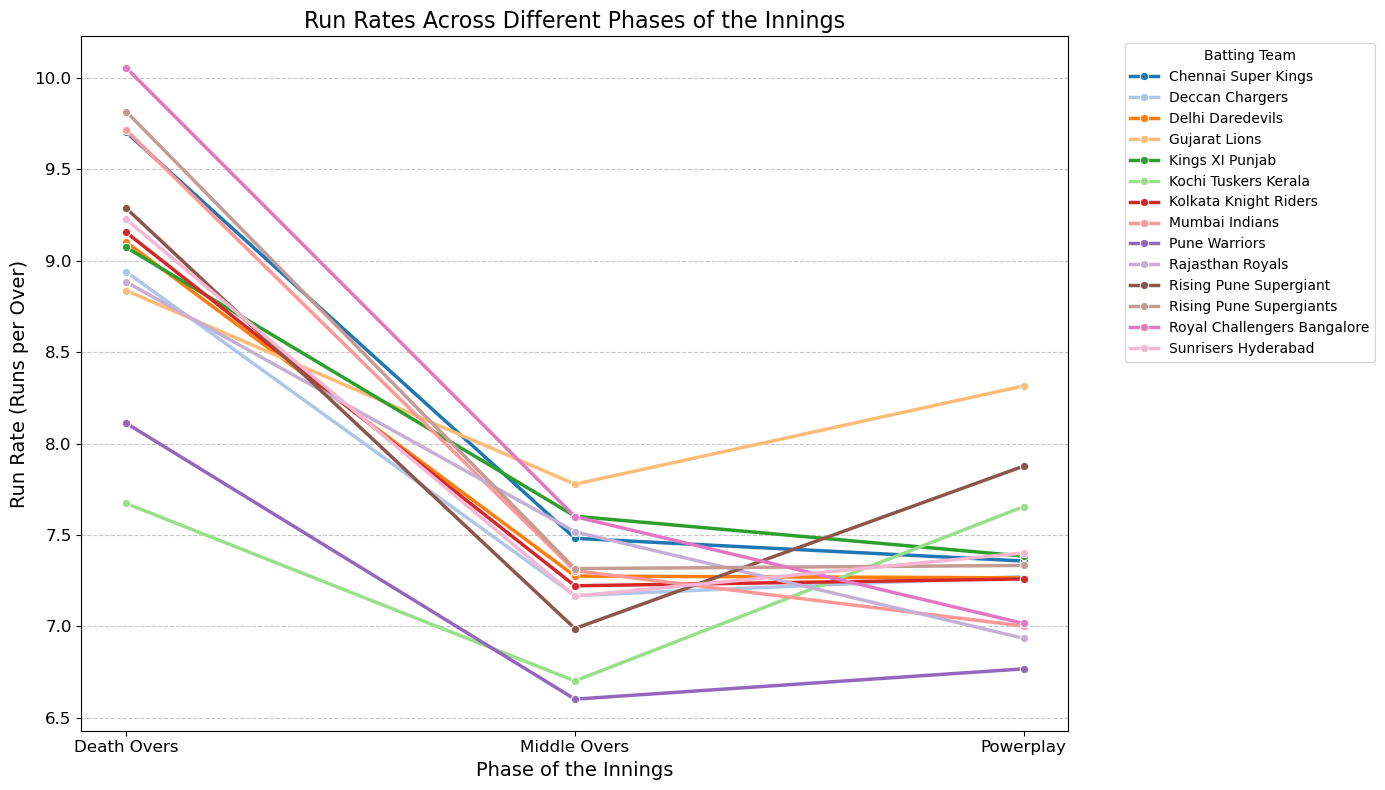

In [48]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=phase_stats, x='phase', y='run_rate', hue='batting_team', marker='o', palette='tab20', linewidth=2.5)
plt.title('Run Rates Across Different Phases of the Innings', fontsize=16)
plt.xlabel('Phase of the Innings', fontsize=14)
plt.ylabel('Run Rate (Runs per Over)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Batting Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Insights:
#### Powerplay : Hihghest(Gujrat Lions) Lowest(Pune warriors)
#### Middle Overs : Hihghest(Gujrat Lions) Lowest(Pune warriors)
#### Middle Overs : Hihghest(Royal Challengers Banglore) Lowest(Kochi Tuskers kerela)

## 5. How do scoring patterns and run rates differ in super overs compared to regular overs?

In [49]:
regular_overs = df[df['is_super_over'] == 0]
super_overs = df[df['is_super_over'] == 1]

In [50]:
regular_overs.head(1)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,phase
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,Powerplay


In [51]:
super_overs.head(1)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,phase
8092,34,3,Mumbai Indians,Gujarat Lions,1,1,JC Buttler,KA Pollard,JP Faulkner,1,...,tie,0,Mumbai Indians,0,0,KH Pandya,Saurashtra Cricket Association Stadium,AK Chaudhary,CB Gaffaney,Powerplay


In [52]:
regular_run_rates = regular_overs.groupby('over')['total_runs'].mean() * 6

In [53]:
regular_run_rates.head()

over
1    5.662214
2    6.729608
3    7.452345
4    7.750190
5    7.792990
Name: total_runs, dtype: float64

In [54]:
super_run_rates = super_overs.groupby('match_id')['total_runs'].sum()

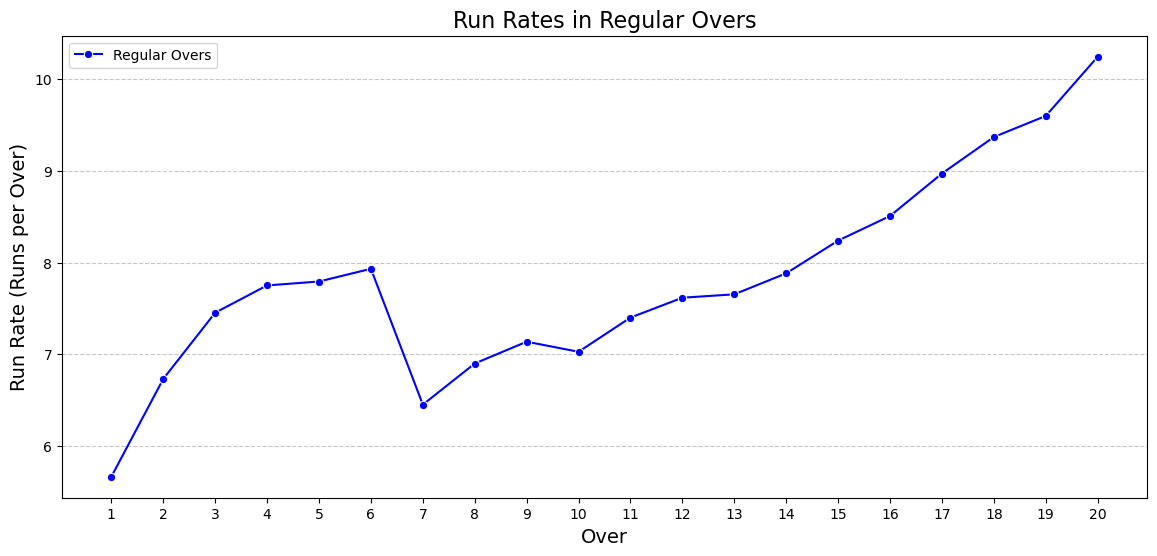

In [55]:
# Plot run rates for regular overs
plt.figure(figsize=(14, 6))
sns.lineplot(x=regular_run_rates.index, y=regular_run_rates.values, marker='o', color='blue', label='Regular Overs')
plt.title('Run Rates in Regular Overs', fontsize=16)
plt.xlabel('Over', fontsize=14)
plt.ylabel('Run Rate (Runs per Over)', fontsize=14)
plt.xticks(range(1, 21))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

In [56]:
super_run_rates.head()

match_id
34     17
126    33
190    19
388    35
401    26
Name: total_runs, dtype: int64

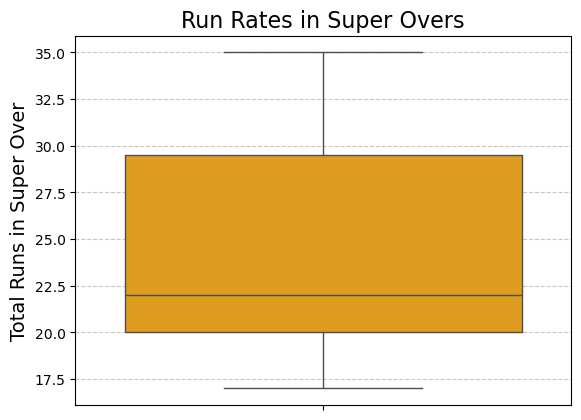

In [57]:
# Plot run rates for super overs
sns.boxplot(y=super_run_rates.values, color='orange')
plt.title('Run Rates in Super Overs', fontsize=16)
plt.ylabel('Total Runs in Super Over', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Insights:
Runrate between <b>regular overs</b> ranges between <b>5-11</b><br>
Runrate in <b>super overs</b> range mostly ranges between <b>20-29</b>

## 6. What is the distribution of different dismissal types (caught, bowled, LBW, etc.)? Are there any trends in how batsmen are getting out?

In [58]:
dismissals = df[df['player_dismissed'].notna()]

In [60]:
dismissal_text = ' '.join(dismissals['dismissal_kind'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(dismissal_text)

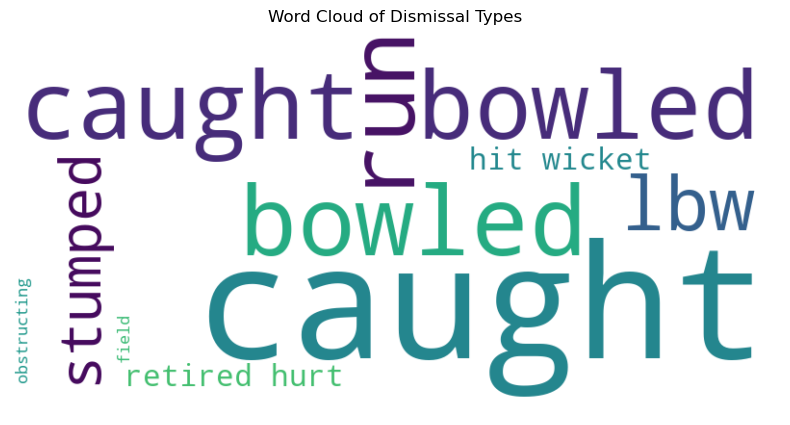

In [61]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Dismissal Types')
plt.show()

## 7. Which bowlers have the best performance in terms of wickets taken, economy rate, and bowling strike rate? What are their preferred dismissal methods?

In [62]:
wickets_taken = df[df['player_dismissed'].notna()].groupby('bowler').size().reset_index(name='wickets')

In [63]:
wickets_taken

,bowler,wickets
0,A Ashish Reddy,19
1,A Chandila,11
2,A Choudhary,5
3,A Flintoff,2
4,A Kumble,49
...,...,...
309,YA Abdulla,15
310,YK Pathan,45
311,YS Chahal,72
312,Yuvraj Singh,39


In [64]:
runs_conceded = df.groupby('bowler')['total_runs'].sum().reset_index(name='runs_conceded')
balls_bowled = df.groupby('bowler').size().reset_index(name='balls_bowled')

# Merge wickets, runs, and balls data
bowler_stats = pd.merge(wickets_taken, runs_conceded, on='bowler')
bowler_stats = pd.merge(bowler_stats, balls_bowled, on='bowler')

# Calculate economy rate
bowler_stats['economy_rate'] = round((bowler_stats['runs_conceded'] / bowler_stats['balls_bowled']) * 6,2)

In [65]:
bowler_stats['bowling_strike_rate'] = round(bowler_stats['balls_bowled'] / bowler_stats['wickets'],2)

In [66]:
bowler_stats

,bowler,wickets,runs_conceded,balls_bowled,economy_rate,bowling_strike_rate
0,A Ashish Reddy,19,400,270,8.89,14.21
1,A Chandila,11,245,234,6.28,21.27
2,A Choudhary,5,144,108,8.00,21.60
3,A Flintoff,2,106,66,9.64,33.00
4,A Kumble,49,1089,983,6.65,20.06
...,...,...,...,...,...,...
309,YA Abdulla,15,311,222,8.41,14.80
310,YK Pathan,45,1421,1166,7.31,25.91
311,YS Chahal,72,1600,1219,7.88,16.93
312,Yuvraj Singh,39,1068,869,7.37,22.28


In [67]:
# Sort by wickets taken (descending), economy rate (ascending), and strike rate (ascending)
top_bowlers = bowler_stats.sort_values(by=['wickets', 'economy_rate', 'bowling_strike_rate'], ascending=[False, True, True])
top_bowlers.head(10) # Display top 10 bowlers

,bowler,wickets,runs_conceded,balls_bowled,economy_rate,bowling_strike_rate
259,SL Malinga,170,3034,2694,6.76,15.85
5,A Mishra,142,3305,2703,7.34,19.04
80,DJ Bravo,137,2815,2110,8.00,15.40
107,Harbhajan Singh,136,3453,2989,6.93,21.98
204,PP Chawla,133,3315,2594,7.67,19.50
219,R Vinay Kumar,125,2976,2161,8.26,17.29
7,A Nehra,121,2537,1974,7.71,16.31
313,Z Khan,119,2860,2276,7.54,19.13
46,B Kumar,117,2410,2054,7.04,17.56
209,R Ashwin,110,2552,2359,6.49,21.45


In [68]:
dismissals = df[df['player_dismissed'].notna()]

In [69]:
dismissal_methods = dismissals.groupby(['bowler', 'dismissal_kind']).size().unstack().fillna(0)

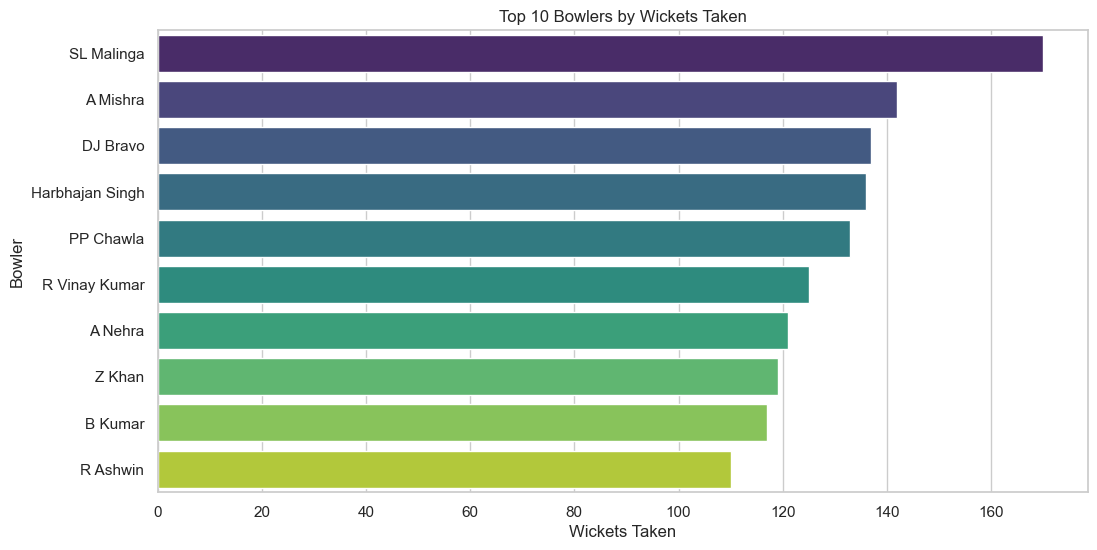

In [70]:
sns.set(style="whitegrid")

# Plot top 10 bowlers by wickets taken
plt.figure(figsize=(12, 6))
sns.barplot(x='wickets', y='bowler', data=top_bowlers.head(10), palette='viridis',hue='bowler',legend=False)
plt.title('Top 10 Bowlers by Wickets Taken')
plt.xlabel('Wickets Taken')
plt.ylabel('Bowler')
plt.show()

In [71]:
dismissal_methods

dismissal_kind,bowled,caught,caught and bowled,hit wicket,lbw,obstructing the field,retired hurt,run out,stumped
bowler,,,,,,,,,
A Ashish Reddy,6.0,8.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0
A Chandila,0.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,2.0
A Choudhary,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Flintoff,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
A Kumble,8.0,24.0,1.0,0.0,4.0,0.0,0.0,4.0,8.0
...,...,...,...,...,...,...,...,...,...
YA Abdulla,4.0,10.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
YK Pathan,9.0,21.0,2.0,0.0,5.0,0.0,0.0,4.0,4.0
YS Chahal,9.0,49.0,1.0,0.0,3.0,0.0,0.0,2.0,8.0


In [72]:
bowler_stats_with_dismissals = pd.merge(bowler_stats, dismissal_methods, on='bowler')

In [73]:
bowler_stats_with_dismissals

,bowler,wickets,runs_conceded,balls_bowled,economy_rate,bowling_strike_rate,bowled,caught,caught and bowled,hit wicket,lbw,obstructing the field,retired hurt,run out,stumped
0,A Ashish Reddy,19,400,270,8.89,14.21,6.0,8.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0
1,A Chandila,11,245,234,6.28,21.27,0.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,2.0
2,A Choudhary,5,144,108,8.00,21.60,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,A Flintoff,2,106,66,9.64,33.00,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,A Kumble,49,1089,983,6.65,20.06,8.0,24.0,1.0,0.0,4.0,0.0,0.0,4.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,YA Abdulla,15,311,222,8.41,14.80,4.0,10.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
310,YK Pathan,45,1421,1166,7.31,25.91,9.0,21.0,2.0,0.0,5.0,0.0,0.0,4.0,4.0
311,YS Chahal,72,1600,1219,7.88,16.93,9.0,49.0,1.0,0.0,3.0,0.0,0.0,2.0,8.0
312,Yuvraj Singh,39,1068,869,7.37,22.28,9.0,19.0,2.0,0.0,2.0,0.0,0.0,3.0,4.0


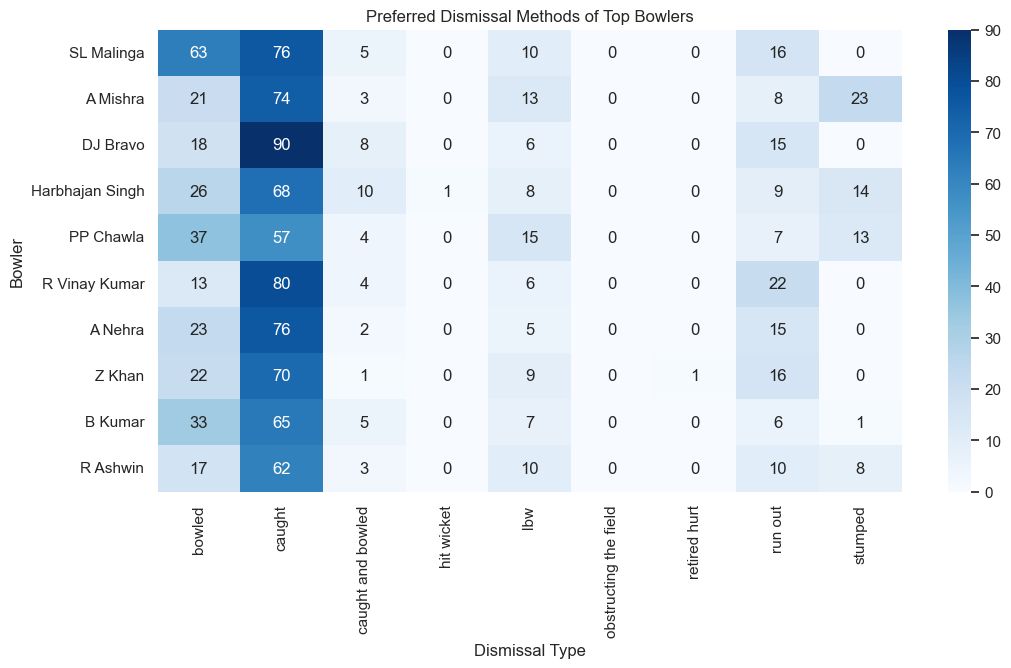

In [74]:
# Heatmap for top bowlers and their dismissal methods
top_bowlers_dismissals = bowler_stats_with_dismissals.sort_values(by='wickets', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.heatmap(top_bowlers_dismissals.set_index('bowler').iloc[:, 5:], annot=True, fmt='g', cmap='Blues')
plt.title('Preferred Dismissal Methods of Top Bowlers')
plt.xlabel('Dismissal Type')
plt.ylabel('Bowler')
plt.show()

### Insights:
L Malinga : Bowled and caught are preferred dismissal methods<br>
A Mishra : Caught and stumped are preferred dismissal methods<br>
Dj Bravo : Catches is most preferred dismissal method

## 8. Analyze the win-loss trends of each team across different seasons. Are there teams that have shown consistent improvement or decline?

In [75]:
# Filter relevant columns
matches = df[['season', 'team1', 'team2', 'winner']].drop_duplicates()

In [76]:
wins = matches.groupby(['season', 'winner']).size().reset_index(name='wins')
wins = wins.rename(columns={'winner': 'team'})

In [77]:
wins

,season,team,wins
0,2008,Chennai Super Kings,7
1,2008,Deccan Chargers,2
2,2008,Delhi Daredevils,7
3,2008,Kings XI Punjab,6
4,2008,Kolkata Knight Riders,5
...,...,...,...
79,2017,Kolkata Knight Riders,8
80,2017,Mumbai Indians,8
81,2017,Rising Pune Supergiant,8
82,2017,Royal Challengers Bangalore,2


In [78]:
# Combine team1 and team2 to get all matches played by each team
team1_matches = matches[['season', 'team1']].rename(columns={'team1': 'team'})
team2_matches = matches[['season', 'team2']].rename(columns={'team2': 'team'})
total_matches = pd.concat([team1_matches, team2_matches]).groupby(['season', 'team']).size().reset_index(name='total_matches')

In [79]:
total_matches

,season,team,total_matches
0,2008,Chennai Super Kings,13
1,2008,Deccan Chargers,12
2,2008,Delhi Daredevils,13
3,2008,Kings XI Punjab,10
4,2008,Kolkata Knight Riders,10
...,...,...,...
79,2017,Kolkata Knight Riders,14
80,2017,Mumbai Indians,12
81,2017,Rising Pune Supergiant,13
82,2017,Royal Challengers Bangalore,10


In [80]:
win_loss = pd.merge(total_matches, wins, on=['season', 'team'], how='left').fillna(0)
win_loss['losses'] = win_loss['total_matches'] - win_loss['wins']

In [81]:
win_loss['win_percentage'] = round((win_loss['wins'] / win_loss['total_matches']) * 100,2)

In [82]:
win_loss = win_loss.sort_values(by=['team', 'season'])

In [83]:
win_loss

,season,team,total_matches,wins,losses,win_percentage
0,2008,Chennai Super Kings,13,7,6,53.85
8,2009,Chennai Super Kings,12,7,5,58.33
16,2010,Chennai Super Kings,15,8,7,53.33
24,2011,Chennai Super Kings,15,10,5,66.67
34,2012,Chennai Super Kings,14,8,6,57.14
...,...,...,...,...,...,...
51,2013,Sunrisers Hyderabad,14,8,6,57.14
59,2014,Sunrisers Hyderabad,13,6,7,46.15
67,2015,Sunrisers Hyderabad,13,6,7,46.15
75,2016,Sunrisers Hyderabad,12,7,5,58.33


In [84]:
win_loss

,season,team,total_matches,wins,losses,win_percentage
0,2008,Chennai Super Kings,13,7,6,53.85
8,2009,Chennai Super Kings,12,7,5,58.33
16,2010,Chennai Super Kings,15,8,7,53.33
24,2011,Chennai Super Kings,15,10,5,66.67
34,2012,Chennai Super Kings,14,8,6,57.14
...,...,...,...,...,...,...
51,2013,Sunrisers Hyderabad,14,8,6,57.14
59,2014,Sunrisers Hyderabad,13,6,7,46.15
67,2015,Sunrisers Hyderabad,13,6,7,46.15
75,2016,Sunrisers Hyderabad,12,7,5,58.33


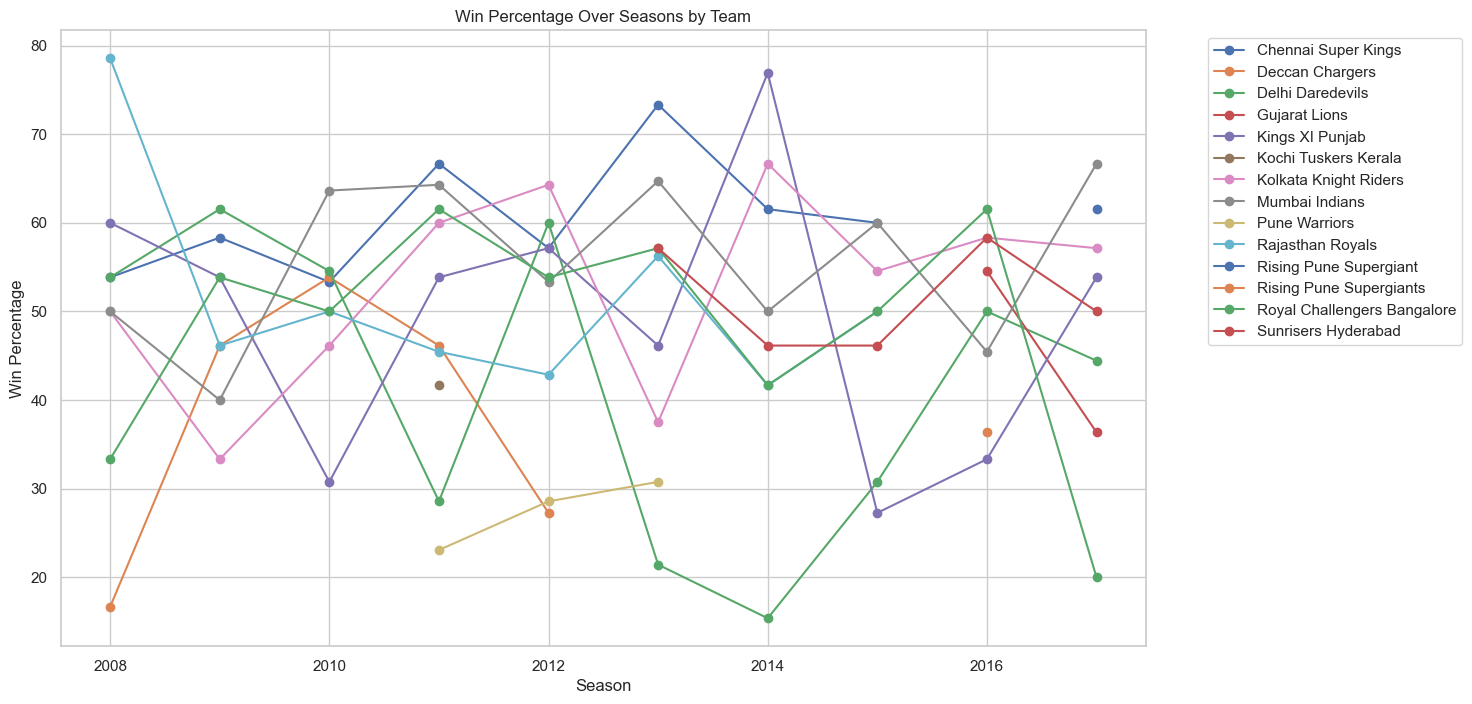

In [85]:
plt.figure(figsize=(14, 8))
for team in win_loss['team'].unique():
    team_data = win_loss[win_loss['team'] == team]
    plt.plot(team_data['season'], team_data['win_percentage'], label=team, marker='o')

plt.title('Win Percentage Over Seasons by Team')
plt.xlabel('Season')
plt.ylabel('Win Percentage')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Insights:
Teams like <b>Mumbai Indians, Chennai Super Kings, Kolkata Knight Riders</b> have consistent win percentage across seasons.<br>
Teams like <b>Royal Challengers banglore, Kings XI Punjab</b> have inconsistent win percentage across seasons.

## 9. Which fielders contribute the most to dismissals through catches and run-outs?

In [86]:
dismissals = df[df['player_dismissed'].notna()]
catches_and_runouts = dismissals[dismissals['dismissal_kind'].isin(['caught', 'run out'])]

In [87]:
catches = catches_and_runouts[catches_and_runouts['dismissal_kind'] == 'caught']
catches_by_fielder = catches.groupby('fielder').size().reset_index(name='catches')

In [88]:
catches_by_fielder

,fielder,catches
0,A Ashish Reddy,8
1,A Chandila,2
2,A Chopra,2
3,A Flintoff,3
4,A Kumble,9
...,...,...
435,YV Takawale,13
436,Yashpal Singh,3
437,Younis Khan,1
438,Yuvraj Singh,28


In [89]:
run_outs = catches_and_runouts[catches_and_runouts['dismissal_kind'] == 'run out']
run_outs_by_fielder = run_outs.groupby('fielder').size().reset_index(name='run_outs')

In [90]:
run_outs_by_fielder

,fielder,run_outs
0,A Ashish Reddy,2
1,A Chopra,1
2,A Mishra,8
3,A Mithun,1
4,A Mukund (sub),1
...,...,...
234,YK Pathan,9
235,YS Chahal,3
236,YV Takawale,4
237,Yuvraj Singh,8


In [91]:
fielder_contributions = pd.merge(catches_by_fielder, run_outs_by_fielder, on='fielder', how='outer').fillna(0)
fielder_contributions['total_contributions'] = fielder_contributions['catches'] + fielder_contributions['run_outs']

In [92]:
fielder_contributions

,fielder,catches,run_outs,total_contributions
0,A Ashish Reddy,8.0,2.0,10.0
1,A Chandila,2.0,0.0,2.0
2,A Chopra,2.0,1.0,3.0
3,A Flintoff,3.0,0.0,3.0
4,A Kumble,9.0,0.0,9.0
...,...,...,...,...
444,YV Takawale,13.0,4.0,17.0
445,Yashpal Singh,3.0,0.0,3.0
446,Younis Khan,1.0,0.0,1.0
447,Yuvraj Singh,28.0,8.0,36.0


In [93]:
top_fielders = fielder_contributions.sort_values(by='total_contributions', ascending=False)
top_fielders.head(10)  # Display top 10 fielders

,fielder,catches,run_outs,total_contributions
189,KD Karthik,88.0,13.0,101.0
251,MS Dhoni,76.0,20.0,96.0
364,SK Raina,83.0,13.0,96.0
17,AB de Villiers,81.0,13.0,94.0
336,RV Uthappa,75.0,8.0,83.0
319,RG Sharma,70.0,9.0,79.0
421,V Kohli,60.0,14.0,74.0
270,NV Ojha,65.0,7.0,72.0
183,KA Pollard,64.0,8.0,72.0
280,PA Patel,60.0,10.0,70.0


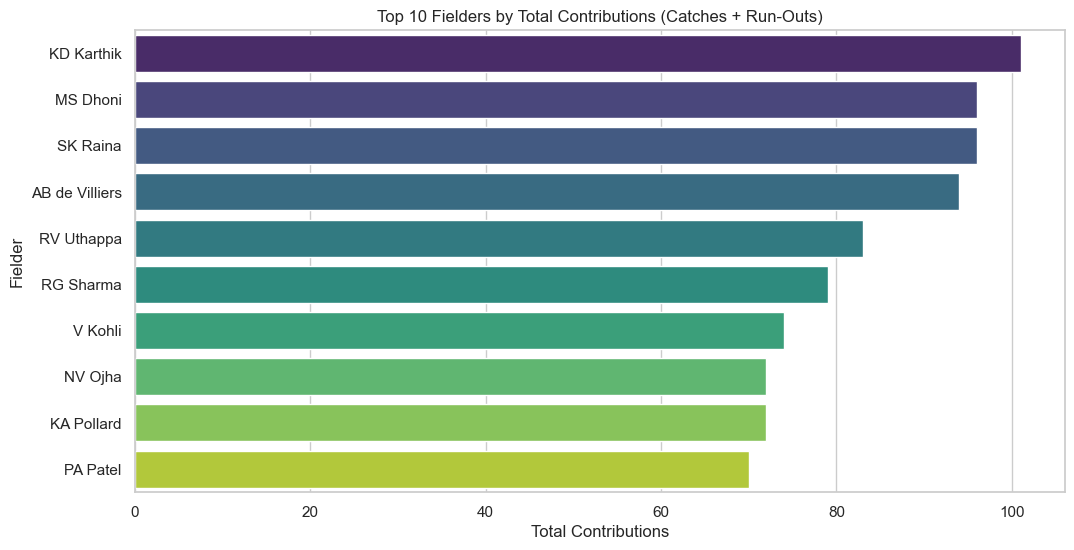

In [94]:
# Plot top 10 fielders by total contributions
plt.figure(figsize=(12, 6))
sns.barplot(x='total_contributions', y='fielder', data=top_fielders.head(10), palette='viridis',hue='fielder',legend=False)
plt.title('Top 10 Fielders by Total Contributions (Catches + Run-Outs)')
plt.xlabel('Total Contributions')
plt.ylabel('Fielder')
plt.show()

### Insights:
<b>Dinesh Karthik and MS Dhoni</b> have maxmium dismissals in terms of catches and run outs

## 10. How are wickets distributed across overs in the matches? Are there specific overs where bowlers tend to be more successful?

In [95]:
dismissals = df[df['player_dismissed'].notna()]

In [96]:
wickets_by_over = dismissals.groupby('over').size().reset_index(name='wickets')

In [97]:
wickets_by_over

,over,wickets
0,1,266
1,2,299
2,3,321
3,4,308
4,5,331
5,6,327
6,7,264
7,8,268
8,9,307
9,10,299


In [98]:
overs=dismissals['over']

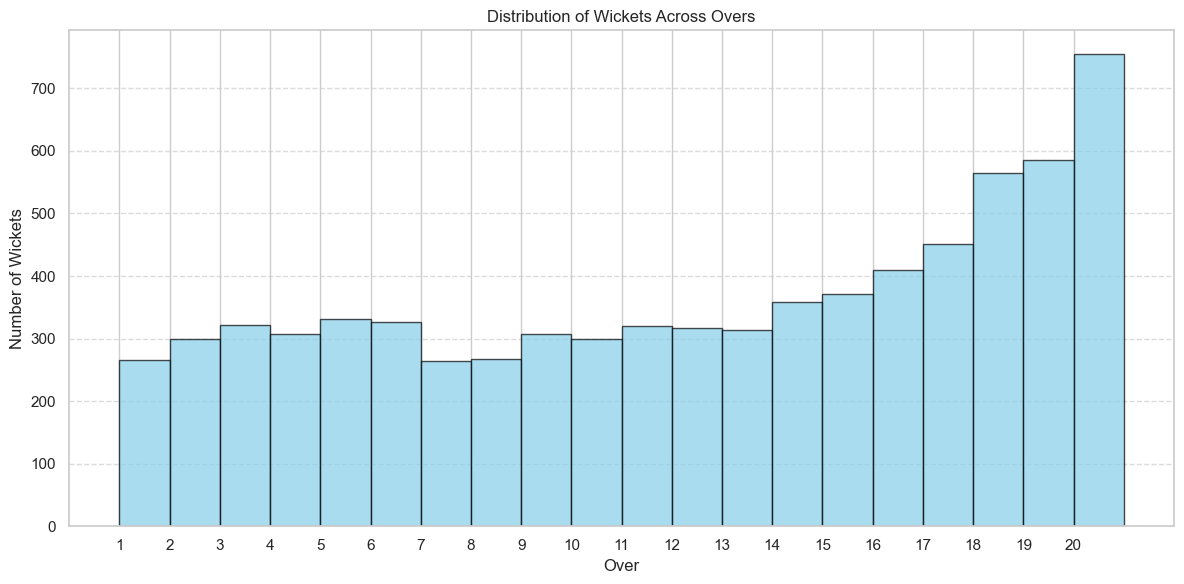

In [99]:
# Plot the histogram
plt.figure(figsize=(12, 6))
plt.hist(overs, bins=20, range=(1, 21), edgecolor='black', color='skyblue', alpha=0.7)

# Add labels and title
plt.title('Distribution of Wickets Across Overs')
plt.xlabel('Over')
plt.ylabel('Number of Wickets')
plt.xticks(range(1, 21))  # Assuming 20 overs in a match
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [100]:
average_wickets_per_over = wickets_by_over['wickets'].mean()
print(f'Average wickets per over: {average_wickets_per_over:.2f}')

Average wickets per over: 371.90


In [101]:
high_wicket_overs = wickets_by_over[wickets_by_over['wickets'] > average_wickets_per_over]
print('Overs with above-average wickets:')
print(high_wicket_overs)

Overs with above-average wickets:
    over  wickets
14    15      372
15    16      410
16    17      451
17    18      565
18    19      586
19    20      755


### Insights:
The most successful overs are between <b>18-20 overs<b>.

## 11. Analyze the bowling strength of teams based on metrics like economy rate, bowling strike rate, and performance in different phases of the match.

In [102]:
# Filter relevant columns
bowling_data = df[['match_id', 'inning', 'bowling_team', 'bowler', 'over', 'ball', 'total_runs', 'player_dismissed']]

In [108]:
# Define match phases
def match_phase(over):
    if over <= 6:
        return 'Powerplay'
    elif over <= 15:
        return 'Middle Overs'
    else:
        return 'Death Overs'

bowling_data.loc[:, 'phase'] = bowling_data['over'].apply(match_phase)

In [109]:
bowling_data.head()

,match_id,inning,bowling_team,bowler,over,ball,total_runs,player_dismissed,phase
0,1,1,Royal Challengers Bangalore,TS Mills,1,1,0,NaN,Powerplay
1,1,1,Royal Challengers Bangalore,TS Mills,1,2,0,NaN,Powerplay
2,1,1,Royal Challengers Bangalore,TS Mills,1,3,4,NaN,Powerplay
3,1,1,Royal Challengers Bangalore,TS Mills,1,4,0,NaN,Powerplay
4,1,1,Royal Challengers Bangalore,TS Mills,1,5,2,NaN,Powerplay


In [110]:
# Calculate runs conceded and balls bowled by each team in each phase
bowling_stats = bowling_data.groupby(['bowling_team', 'phase']).agg(
    runs_conceded=('total_runs', 'sum'),
    balls_bowled=('ball', 'count'),
    wickets_taken=('player_dismissed', lambda x: x.notna().sum())
).reset_index()

In [111]:
bowling_stats

,bowling_team,phase,runs_conceded,balls_bowled,wickets_taken
0,Chennai Super Kings,Death Overs,5173,3490,315
1,Chennai Super Kings,Middle Overs,8644,7181,304
2,Chennai Super Kings,Powerplay,5973,4891,201
3,Deccan Chargers,Death Overs,3451,2062,166
4,Deccan Chargers,Middle Overs,4939,4154,161
5,Deccan Chargers,Powerplay,3228,2823,119
6,Delhi Daredevils,Death Overs,5993,3834,316
7,Delhi Daredevils,Middle Overs,9673,7804,311
8,Delhi Daredevils,Powerplay,6677,5461,205
9,Gujarat Lions,Death Overs,1354,768,51


In [112]:
# Calculate economy rate (runs conceded per over)
bowling_stats['economy_rate'] = round((bowling_stats['runs_conceded'] / bowling_stats['balls_bowled']) * 6,2)

# Calculate bowling strike rate (balls bowled per wicket)
bowling_stats['bowling_strike_rate'] = round(bowling_stats['balls_bowled'] / bowling_stats['wickets_taken'],2)

In [113]:
bowling_stats

,bowling_team,phase,runs_conceded,balls_bowled,wickets_taken,economy_rate,bowling_strike_rate
0,Chennai Super Kings,Death Overs,5173,3490,315,8.89,11.08
1,Chennai Super Kings,Middle Overs,8644,7181,304,7.22,23.62
2,Chennai Super Kings,Powerplay,5973,4891,201,7.33,24.33
3,Deccan Chargers,Death Overs,3451,2062,166,10.04,12.42
4,Deccan Chargers,Middle Overs,4939,4154,161,7.13,25.80
5,Deccan Chargers,Powerplay,3228,2823,119,6.86,23.72
6,Delhi Daredevils,Death Overs,5993,3834,316,9.38,12.13
7,Delhi Daredevils,Middle Overs,9673,7804,311,7.44,25.09
8,Delhi Daredevils,Powerplay,6677,5461,205,7.34,26.64
9,Gujarat Lions,Death Overs,1354,768,51,10.58,15.06


In [114]:
# Sort by economy rate (lower is better)
economy_rate_sorted = bowling_stats.sort_values(by=['phase', 'economy_rate'])

# Sort by bowling strike rate (lower is better)
strike_rate_sorted = bowling_stats.sort_values(by=['phase', 'bowling_strike_rate'])

# Sort by wickets taken (higher is better)
wickets_sorted = bowling_stats.sort_values(by=['phase', 'wickets_taken'], ascending=[True, False])

In [115]:
economy_rate_sorted.head()

,bowling_team,phase,runs_conceded,balls_bowled,wickets_taken,economy_rate,bowling_strike_rate
15,Kochi Tuskers Kerala,Death Overs,479,324,24,8.87,13.50
0,Chennai Super Kings,Death Overs,5173,3490,315,8.89,11.08
21,Mumbai Indians,Death Overs,6331,4271,346,8.89,12.34
18,Kolkata Knight Riders,Death Overs,5837,3905,316,8.97,12.36
39,Sunrisers Hyderabad,Death Overs,3047,2033,179,8.99,11.36


In [116]:
strike_rate_sorted.head()

,bowling_team,phase,runs_conceded,balls_bowled,wickets_taken,economy_rate,bowling_strike_rate
30,Rising Pune Supergiant,Death Overs,660,439,40,9.02,10.98
0,Chennai Super Kings,Death Overs,5173,3490,315,8.89,11.08
33,Rising Pune Supergiants,Death Overs,616,377,34,9.80,11.09
39,Sunrisers Hyderabad,Death Overs,3047,2033,179,8.99,11.36
36,Royal Challengers Bangalore,Death Overs,6350,4002,332,9.52,12.05


In [117]:
wickets_sorted.head()

,bowling_team,phase,runs_conceded,balls_bowled,wickets_taken,economy_rate,bowling_strike_rate
21,Mumbai Indians,Death Overs,6331,4271,346,8.89,12.34
36,Royal Challengers Bangalore,Death Overs,6350,4002,332,9.52,12.05
6,Delhi Daredevils,Death Overs,5993,3834,316,9.38,12.13
18,Kolkata Knight Riders,Death Overs,5837,3905,316,8.97,12.36
0,Chennai Super Kings,Death Overs,5173,3490,315,8.89,11.08


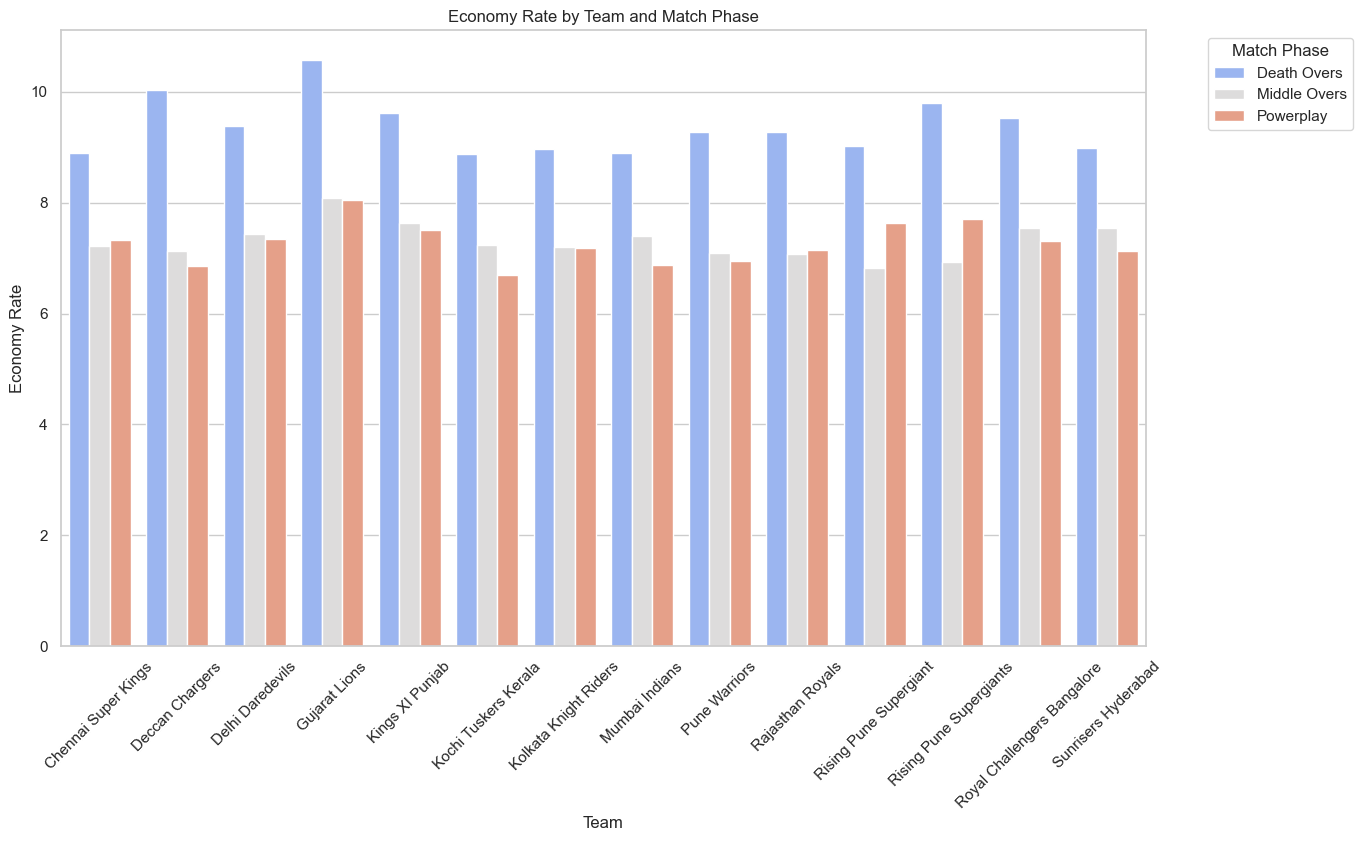

In [118]:
# Plot economy rate by phase
plt.figure(figsize=(14, 8))
sns.barplot(x='bowling_team', y='economy_rate', hue='phase', data=bowling_stats, palette='coolwarm')
plt.title('Economy Rate by Team and Match Phase')
plt.xlabel('Team')
plt.ylabel('Economy Rate')
plt.legend(title='Match Phase', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

### Insights:
<b>Chennai Super Kings</b> has the best Economy Rate in Match phases

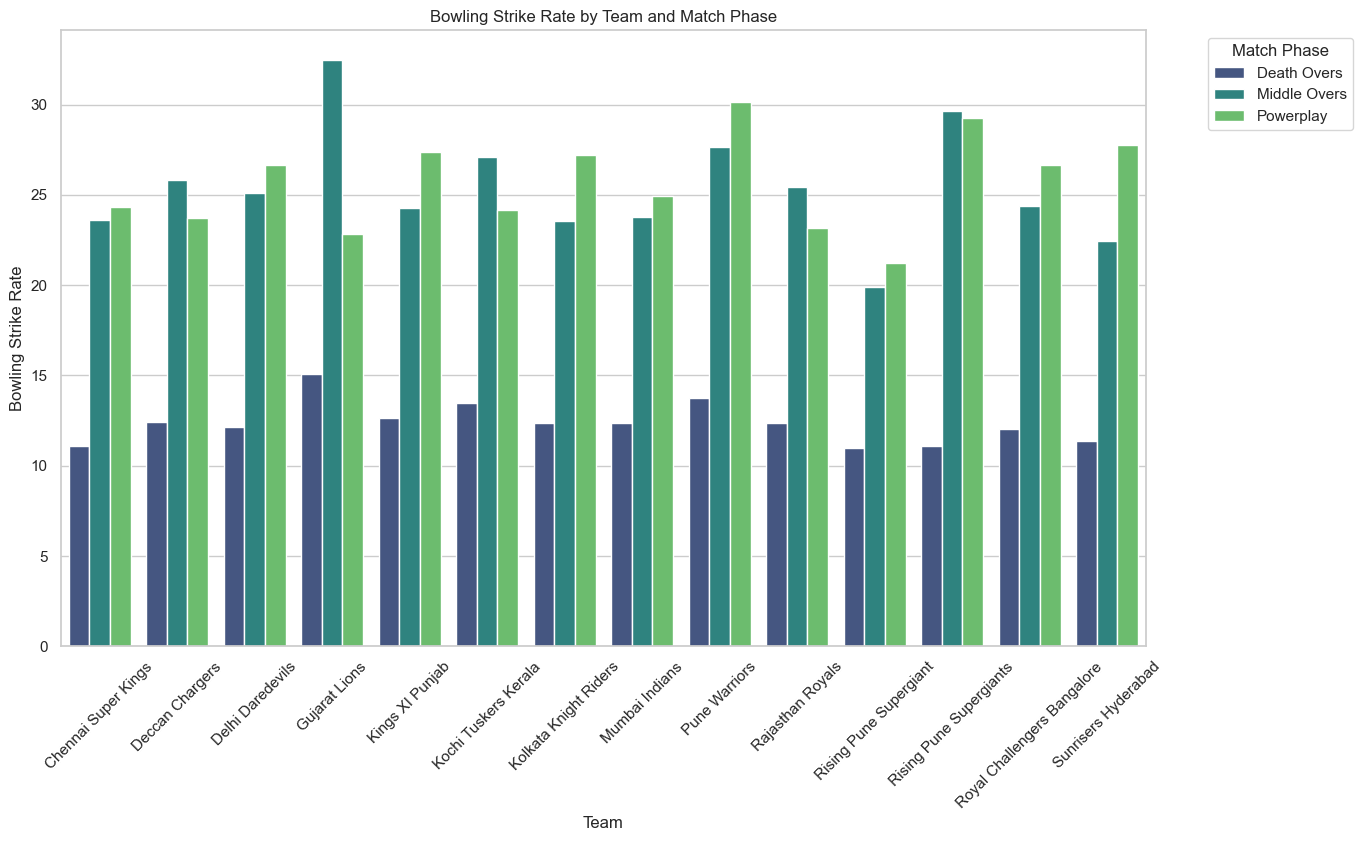

In [119]:
# Plot bowling strike rate by phase
plt.figure(figsize=(14, 8))
sns.barplot(x='bowling_team', y='bowling_strike_rate', hue='phase', data=bowling_stats, palette='viridis')
plt.title('Bowling Strike Rate by Team and Match Phase')
plt.xlabel('Team')
plt.ylabel('Bowling Strike Rate')
plt.legend(title='Match Phase', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

### Insights:
<b>Chennai Super Kings</b> has better Bowling Strike rate compared to ther teams in match phase

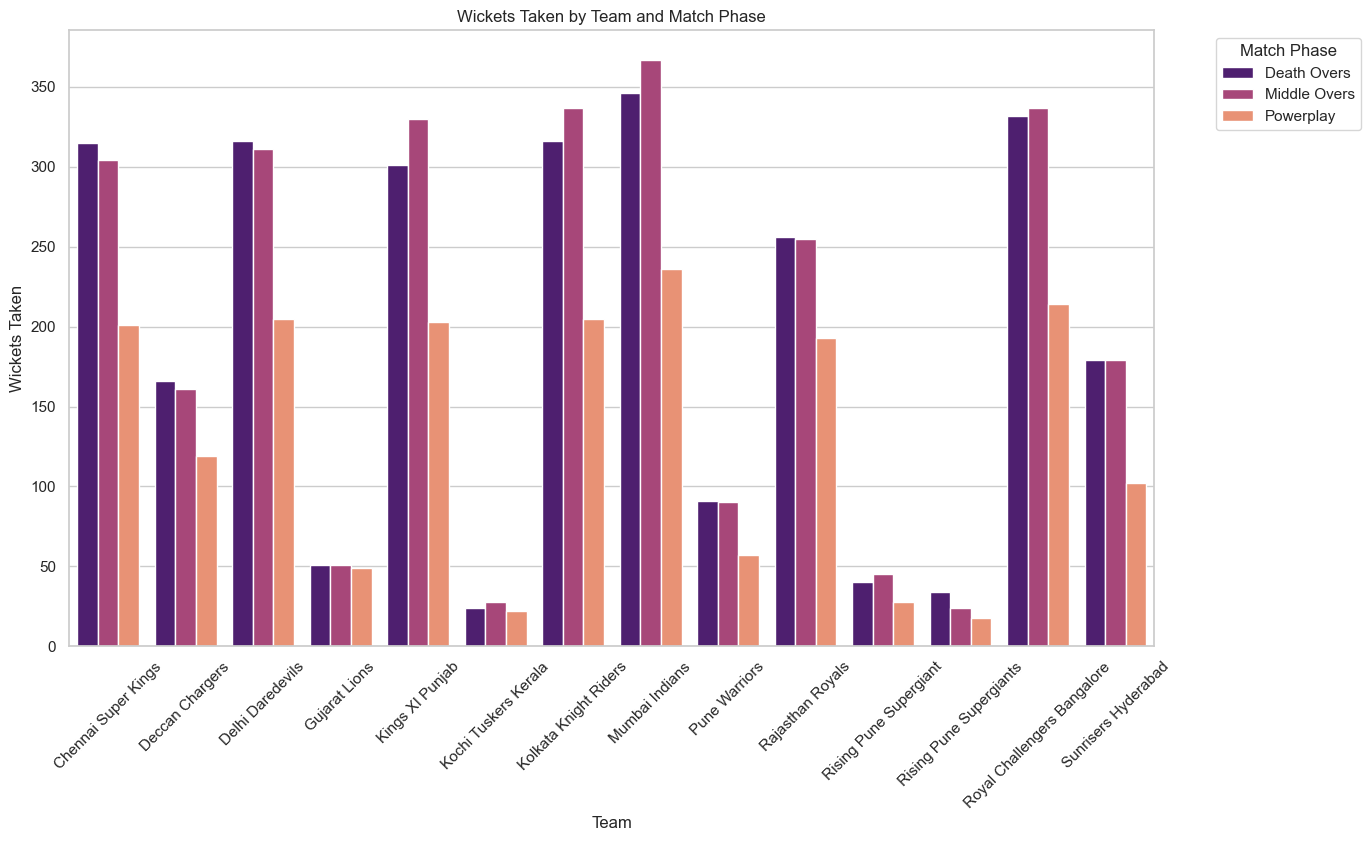

In [120]:
# Plot wickets taken by phase
plt.figure(figsize=(14, 8))
sns.barplot(x='bowling_team', y='wickets_taken', hue='phase', data=bowling_stats, palette='magma')
plt.title('Wickets Taken by Team and Match Phase')
plt.xlabel('Team')
plt.ylabel('Wickets Taken')
plt.legend(title='Match Phase', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

### Insights:
<b>Mumbai Indians</b> has taken most wickets comapred to other teams in different match phases

## 12. What are the characteristics of successful batting partnerships in terms of runs scored and duration

In [121]:
# Group by match_id and batting partnership (batsman & non-striker)
partnership_df = df.groupby(['match_id', 'batsman', 'non_striker']).agg(
    total_runs=('total_runs', 'sum'),  # Total runs scored by the partnership
    balls_faced=('ball', 'count')  # Number of balls faced by the partnership
).reset_index()

In [122]:
partnership_df

,match_id,batsman,non_striker,total_runs,balls_faced
0,1,A Choudhary,YS Chahal,6,2
1,1,BCJ Cutting,DJ Hooda,16,6
2,1,CH Gayle,Mandeep Singh,28,20
3,1,CH Gayle,TM Head,6,3
4,1,DA Warner,S Dhawan,17,9
...,...,...,...,...,...
15830,636,V Kohli,AB de Villiers,22,10
15831,636,V Kohli,CH Gayle,33,26
15832,636,Yuvraj Singh,BCJ Cutting,1,2
15833,636,Yuvraj Singh,DA Warner,19,13


In [123]:
# Calculate the strike rate for each partnership
partnership_df['strike_rate'] = round((partnership_df['total_runs'] / partnership_df['balls_faced']) * 100,2)

In [124]:
# Sort partnerships by total runs scored in descending order
successful_partnerships = partnership_df.sort_values(by='total_runs', ascending=False)

In [125]:
top_partnerships=successful_partnerships.head(10)

In [126]:
top_partnerships

,match_id,batsman,non_striker,total_runs,balls_faced,strike_rate
14028,562,AB de Villiers,V Kohli,138,61,226.23
15400,620,AB de Villiers,V Kohli,132,53,249.06
10324,411,CH Gayle,TM Dilshan,130,49,265.31
9300,372,CH Gayle,V Kohli,128,55,232.73
7447,296,AC Gilchrist,SE Marsh,126,51,247.06
8328,331,DA Warner,NV Ojha,119,55,216.36
1807,72,AC Gilchrist,VVS Laxman,116,50,232.00
9091,363,RG Sharma,HH Gibbs,113,62,182.26
891,36,DA Warner,S Dhawan,105,47,223.40
57,3,CA Lynn,G Gambhir,102,46,221.74


## 13. How do individual batsmen perform against specific bowlers? Are there any notable batsman-bowler matchups?

In [127]:
# Filter data to focus on batsman-bowler interactions
df_batsman_bowler = df[df['batsman'].notna() & df['bowler'].notna()]

In [128]:
df_batsman_bowler[['batsman','bowler']].head()

,batsman,bowler
0,DA Warner,TS Mills
1,DA Warner,TS Mills
2,DA Warner,TS Mills
3,DA Warner,TS Mills
4,DA Warner,TS Mills


In [129]:
# Group by batsman and bowler to calculate performance metrics
batsman_bowler_performance = df_batsman_bowler.groupby(['batsman', 'bowler']).agg(
    runs_scored=('batsman_runs', 'sum'),
    balls_faced=('ball', 'count'),
    dismissals=('player_dismissed', lambda x: x.notna().sum())
).reset_index()

In [130]:
# Calculate strike rate
batsman_bowler_performance['strike_rate'] = round((batsman_bowler_performance['runs_scored'] / 
                                                   batsman_bowler_performance['balls_faced']) * 100,2)

In [131]:
batsman_bowler_performance.head()

,batsman,bowler,runs_scored,balls_faced,dismissals,strike_rate
0,A Ashish Reddy,A Nehra,7,9,1,77.78
1,A Ashish Reddy,AB Dinda,9,7,0,128.57
2,A Ashish Reddy,AD Mathews,25,12,0,208.33
3,A Ashish Reddy,AD Russell,4,3,1,133.33
4,A Ashish Reddy,Anureet Singh,2,2,0,100.00


In [132]:
# Top 10 batsman-bowler pairs by runs scored
top_runs = batsman_bowler_performance.sort_values(by='runs_scored', ascending=False).head(10)

# Top 10 batsman-bowler pairs by strike rate (minimum 30 balls faced)
top_strike_rate = batsman_bowler_performance[batsman_bowler_performance['balls_faced'] >= 30].sort_values(by='strike_rate',
                                                                                                          ascending=False).head(10)

# Top 10 bowlers by dismissals of a specific batsman
top_dismissals = batsman_bowler_performance.sort_values(by='dismissals', ascending=False).head(10)

In [133]:
top_runs

,batsman,bowler,runs_scored,balls_faced,dismissals,strike_rate
14007,SK Raina,PP Chawla,152,90,4,168.89
15913,V Kohli,A Mishra,149,95,1,156.84
16085,V Kohli,UT Yadav,141,83,4,169.88
12238,RG Sharma,PP Chawla,136,103,1,132.04
13936,SK Raina,Harbhajan Singh,132,125,5,105.60
6744,KA Pollard,A Mishra,131,79,1,165.82
15954,V Kohli,DJ Bravo,130,91,1,142.86
16042,V Kohli,R Ashwin,127,101,0,125.74
3370,DA Warner,P Kumar,124,92,3,134.78
12212,RG Sharma,M Morkel,119,69,2,172.46


In [134]:
top_strike_rate

,batsman,bowler,runs_scored,balls_faced,dismissals,strike_rate
5974,JA Morkel,SK Warne,89,39,0,228.21
5666,IK Pathan,RP Singh,68,31,1,219.35
15998,V Kohli,KV Sharma,79,37,0,213.51
6455,JP Duminy,JJ Bumrah,70,33,1,212.12
628,AB de Villiers,Sandeep Sharma,69,33,2,209.09
6856,KA Pollard,RA Jadeja,77,37,2,208.11
6505,JP Duminy,R Vinay Kumar,62,30,0,206.67
547,AB de Villiers,JP Faulkner,62,30,1,206.67
2182,BB McCullum,JA Morkel,63,31,0,203.23
14052,SK Raina,Sandeep Sharma,65,32,1,203.12


In [135]:
top_dismissals

,batsman,bowler,runs_scored,balls_faced,dismissals,strike_rate
9985,MS Dhoni,Z Khan,74,43,7,172.09
9917,MS Dhoni,PP Ojha,98,100,7,98.00
4887,G Gambhir,Z Khan,109,85,6,128.24
1313,AM Rahane,B Kumar,69,75,6,92.00
15914,V Kohli,A Nehra,60,57,6,105.26
12272,RG Sharma,SK Trivedi,45,38,6,118.42
10853,PA Patel,B Kumar,50,59,6,84.75
12251,RG Sharma,R Vinay Kumar,22,34,6,64.71
12162,RG Sharma,DJ Bravo,66,60,5,110.00
14672,SR Watson,AR Patel,25,29,5,86.21


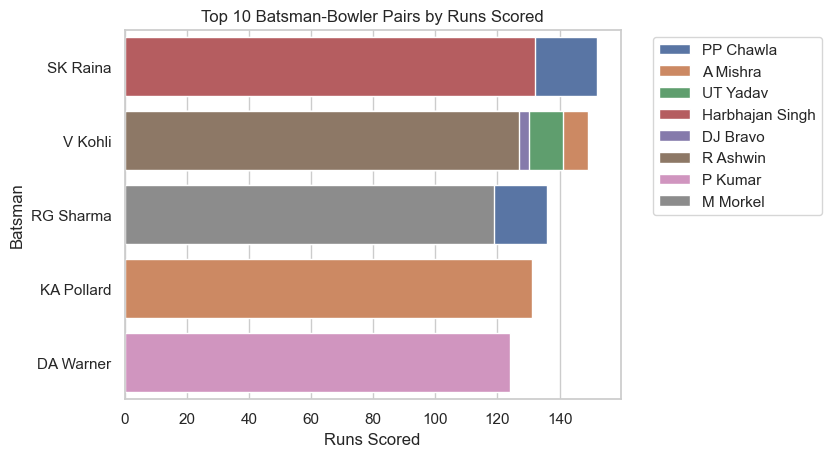

In [136]:
sns.barplot(data=top_runs, x='runs_scored', y='batsman', hue='bowler',dodge=False)
plt.title('Top 10 Batsman-Bowler Pairs by Runs Scored')
plt.xlabel('Runs Scored')
plt.ylabel('Batsman')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Insights:
<b>Virat Kohli</b> has scored runs against bowlers like <b>R Ashwin, DJ Bravo,Umesh Yadav, Amit Mishra</b>

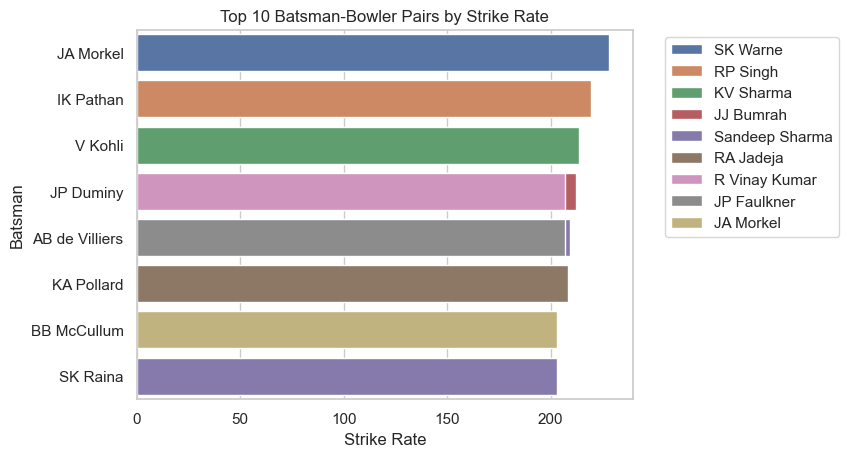

In [137]:
# Bar chart of top 10 batsman-bowler pairs by strike rate
sns.barplot(data=top_strike_rate, x='strike_rate', y='batsman', hue='bowler', dodge=False)
plt.title('Top 10 Batsman-Bowler Pairs by Strike Rate')
plt.xlabel('Strike Rate')
plt.ylabel('Batsman')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

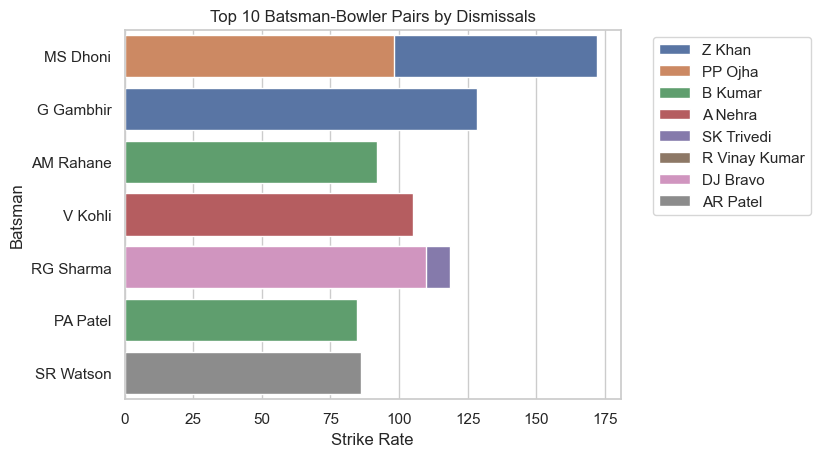

In [159]:
# Bar chart of top 10 batsman-bowler pairs by strike rate
sns.barplot(data=top_dismissals, x='strike_rate', y='batsman', hue='bowler',dodge=False)
plt.title('Top 10 Batsman-Bowler Pairs by Dismissals')
plt.xlabel('Strike Rate')
plt.ylabel('Batsman')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Insights:
<b>MS Dhoni</b> has been dismissed by bowlers like <b>Zaheer Khan, PP Ojha</b>
<b>Gambhir</b> has been dismissed by bowlers like <b>Zaheer Khan</b>

## 14. Do certain batsmen have a higher tendency to get dismissed in specific ways?

In [139]:
# Remove NaN values in 'dismissal_kind' as they indicate not out cases
dismissal_counts = df.dropna(subset=['dismissal_kind'])

# Count dismissals per batsman and dismissal type
batsman_dismissals = dismissal_counts.groupby(['batsman', 'dismissal_kind']).size().reset_index(name='count')

# Sort to show the most common dismissals per batsman
batsman_dismissals_sorted = batsman_dismissals.sort_values(by=['count'], ascending=[False])

# Display the top 10 most common dismissals
batsman_dismissals_sorted.head(10)

,batsman,dismissal_kind,count
1114,SK Raina,caught,94
1022,RV Uthappa,caught,87
971,RG Sharma,caught,83
390,G Gambhir,caught,77
1275,V Kohli,caught,76
1347,Yuvraj Singh,caught,76
561,KD Karthik,caught,71
1282,V Sehwag,caught,70
1333,YK Pathan,caught,68
778,MS Dhoni,caught,65


## 15. How does the presence of specific batsmen at the crease impact the batting team's run rate?

In [140]:
# Calculate total runs and total balls faced per batsman
batsman_run_rate = df.groupby('batsman').agg(
    total_runs=('total_runs', 'sum'),
    total_balls=('ball', 'count')
).reset_index()

# Convert balls to overs (1 over = 6 balls)
batsman_run_rate['overs_faced'] = round(batsman_run_rate['total_balls'] / 6,2)

# Calculate run rate (Runs per over)
batsman_run_rate['run_rate'] = round(batsman_run_rate['total_runs'] / batsman_run_rate['overs_faced'],2)

batsman_run_rate = batsman_run_rate[batsman_run_rate['total_balls']>=100]

# Sort by highest run rate
batsman_run_rate_sorted = batsman_run_rate.sort_values(by='run_rate', ascending=False)

In [141]:
# Display top 10 batsmen with the highest impact on run rate
batsman_run_rate_sorted.head(10)

,batsman,total_runs,total_balls,overs_faced,run_rate
30,AD Russell,615,350,58.33,10.54
382,SN Khan,180,103,17.17,10.48
143,GJ Maxwell,1306,780,130.00,10.05
86,CH Morris,456,275,45.83,9.95
196,KH Pandya,501,313,52.17,9.60
433,V Sehwag,2915,1833,305.50,9.54
83,CA Lynn,410,260,43.33,9.46
85,CH Gayle,3914,2532,422.00,9.27
77,Bipul Sharma,190,124,20.67,9.19
330,RR Pant,577,381,63.50,9.09


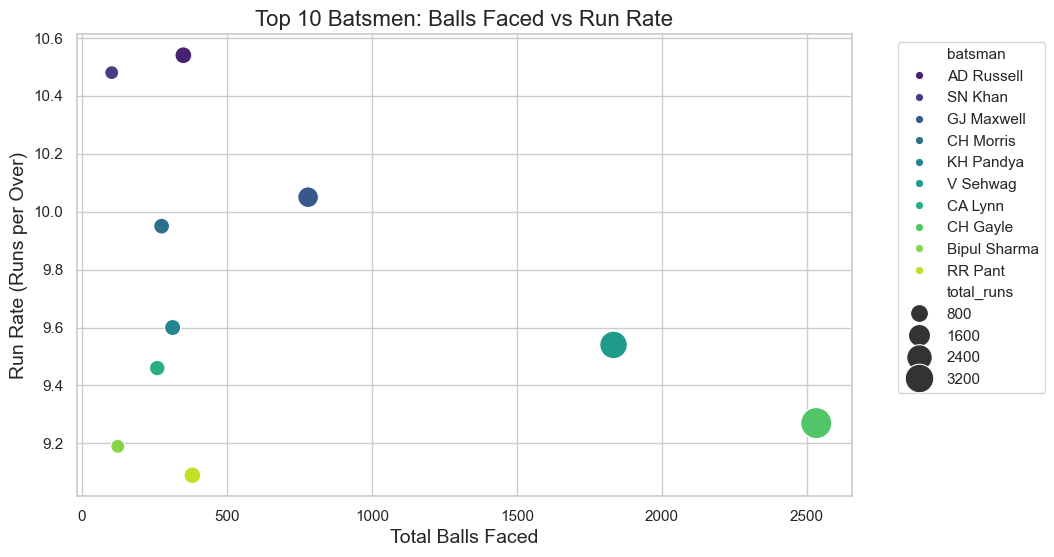

In [142]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='total_balls', 
    y='run_rate', 
    size='total_runs', 
    hue='batsman', 
    data=batsman_run_rate_sorted.head(10), 
    palette='viridis', 
    sizes=(100, 500)
)

# Add labels and title
plt.title('Top 10 Batsmen: Balls Faced vs Run Rate', fontsize=16)
plt.xlabel('Total Balls Faced', fontsize=14)
plt.ylabel('Run Rate (Runs per Over)', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

### Insights:
Batsman like <b>Andre Russel,Glenn Maxwell</b> can significantly impact batting teams runrate.

## 16. How have average run rates and scoring patterns evolved across different IPL seasons?

In [143]:
df_analysis = df[['season', 'total_runs', 'ball']].copy()

# Group by season and calculate the average run rate
seasonal_run_rates = df_analysis.groupby('season').agg(
    total_runs=("total_runs",'sum'),
    total_balls=('ball','count')
)

In [144]:
seasonal_run_rates['run_rate'] = (seasonal_run_rates['total_runs']/seasonal_run_rates['total_balls'])*6

In [145]:
seasonal_run_rates

,total_runs,total_balls,run_rate
season,,,
2008,17937,13489,7.978501
2009,16353,13606,7.211377
2010,18883,14498,7.814733
2011,21154,17013,7.460413
2012,22453,17767,7.582484
2013,22602,18177,7.460637
2014,18931,14300,7.943077
2015,18353,13652,8.066071
2016,18862,14096,8.028661


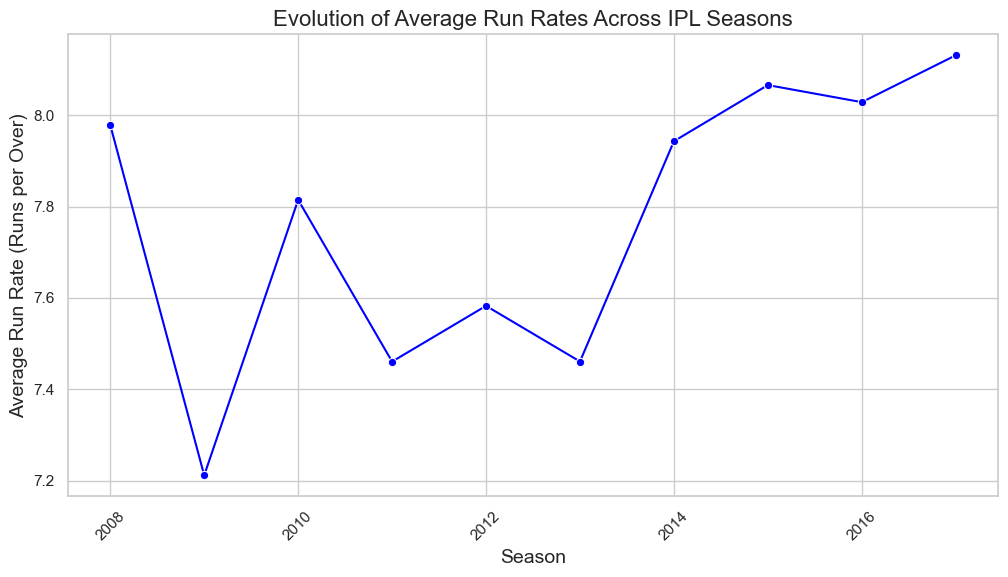

In [146]:
# Visualization
plt.figure(figsize=(12, 6))
sns.lineplot(x='season', y='run_rate', data=seasonal_run_rates, marker='o', color='blue')
plt.title('Evolution of Average Run Rates Across IPL Seasons', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Average Run Rate (Runs per Over)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Insights:
Runrate has gradually increased from season to season it <b>ranged from 7.5 and now it is going above 8<b>

## 17. Has the distribution of different dismissal types changed over the seasons?

In [147]:
# Create a new dataframe with necessary columns
df_dismissals = df[['season', 'dismissal_kind']].copy()

# Filter rows where dismissal_kind is not null
df_dismissals = df_dismissals[df_dismissals['dismissal_kind'].notnull()]

# Group by season and dismissal_kind and count the occurrences
dismissal_counts = df_dismissals.groupby(['season', 'dismissal_kind']).size().reset_index(name='count')

# Calculate the total dismissals for each season
total_dismissals = dismissal_counts.groupby('season')['count'].sum().reset_index(name='total_dismissals')

# Merge the total dismissals back to the dismissal_counts dataframe
dismissal_counts = dismissal_counts.merge(total_dismissals, on='season')

# Calculate the percentage of each dismissal type for each season
dismissal_counts['percentage'] = (dismissal_counts['count'] / dismissal_counts['total_dismissals']) * 100

# Pivot the data for visualization
dismissal_pivot = dismissal_counts.pivot(index='season', columns='dismissal_kind', values='percentage')

In [148]:
dismissal_pivot

dismissal_kind,bowled,caught,caught and bowled,hit wicket,lbw,obstructing the field,retired hurt,run out,stumped
season,,,,,,,,,
2008,18.985507,57.971014,3.043478,0.289855,5.362319,NaN,0.144928,12.318841,1.884058
2009,16.045845,59.455587,2.578797,0.143266,6.733524,NaN,NaN,10.888252,4.154728
2010,19.448276,54.482759,2.344828,NaN,5.655172,NaN,0.275862,12.827586,4.965517
2011,19.188192,58.056581,3.567036,NaN,6.642066,NaN,NaN,9.102091,3.444034
2012,19.347319,59.207459,2.913753,0.233100,4.895105,NaN,0.116550,9.906760,3.379953
2013,18.640351,59.100877,3.728070,NaN,7.675439,0.109649,0.109649,8.662281,1.973684
2014,21.068249,58.011869,1.780415,NaN,5.341246,NaN,0.148368,9.940653,3.709199
2015,17.655572,62.807525,2.460203,NaN,4.486252,NaN,0.144718,9.261939,3.183792
2016,16.666667,60.060060,2.102102,0.450450,6.156156,NaN,0.150150,11.111111,3.303303


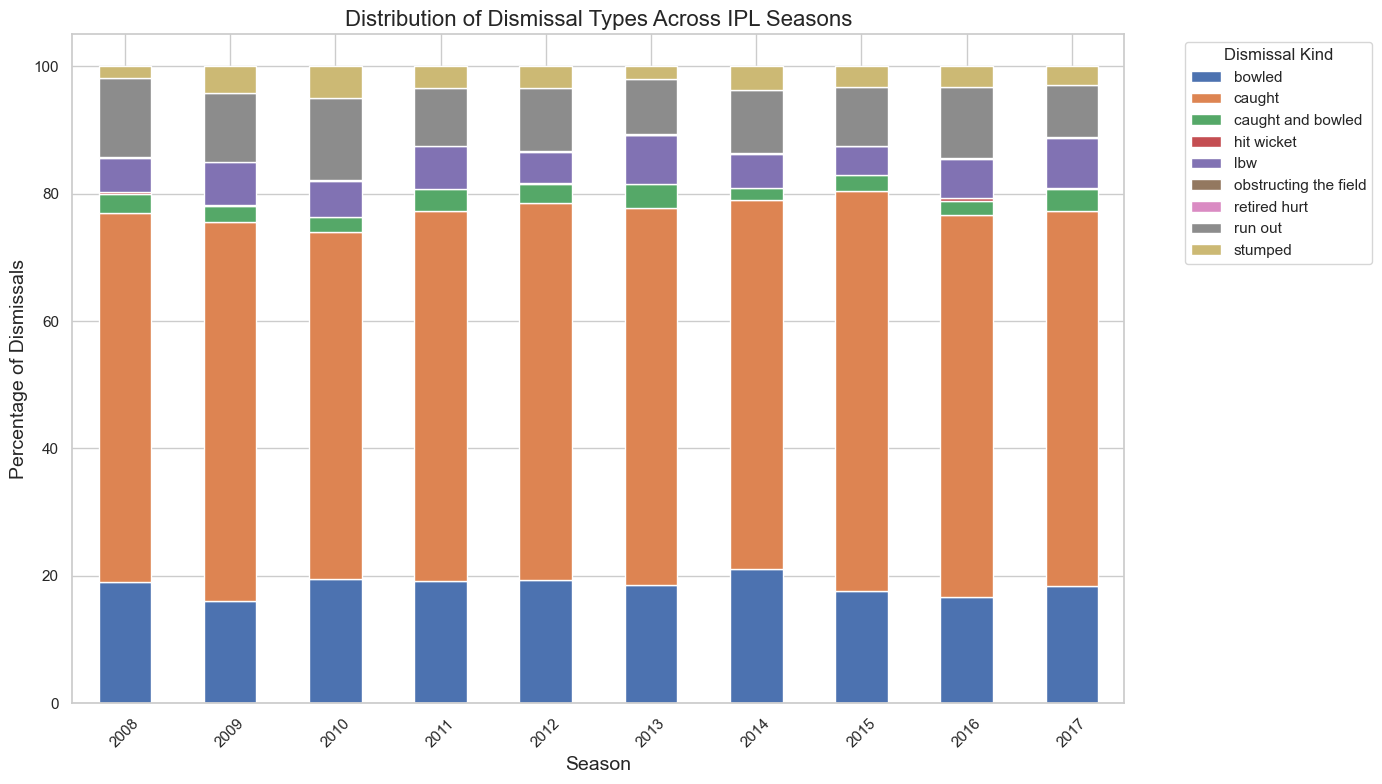

In [149]:
# Visualization: Stacked Bar Plot
dismissal_pivot.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Distribution of Dismissal Types Across IPL Seasons', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Percentage of Dismissals', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Dismissal Kind', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

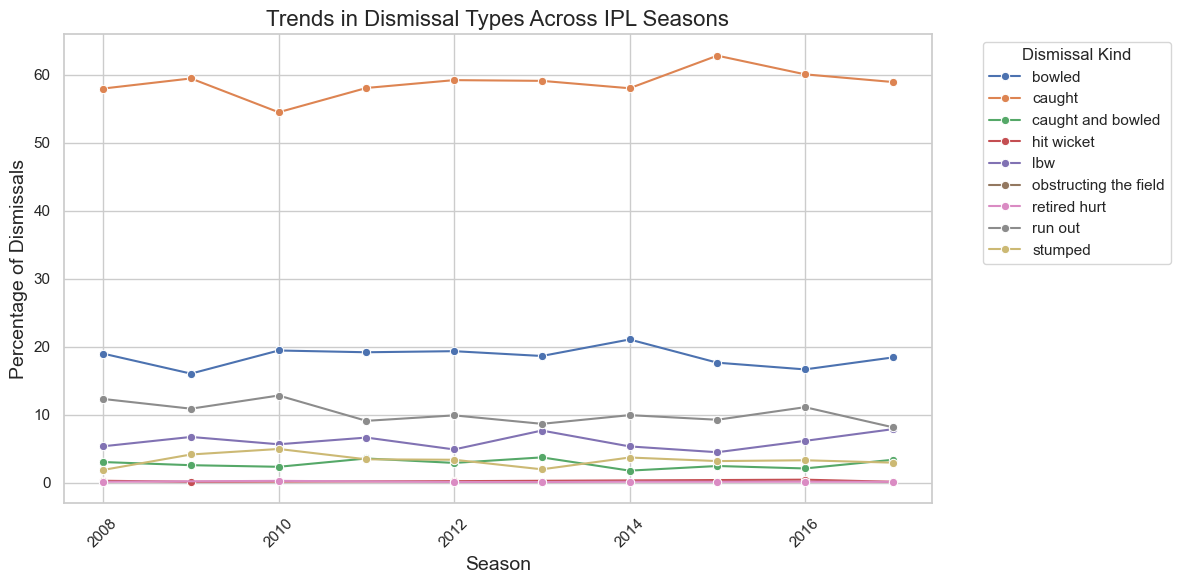

In [150]:
# Visualization: Line Plot for Specific Dismissal Types
plt.figure(figsize=(12, 6))
for dismissal in dismissal_pivot.columns:
    sns.lineplot(x=dismissal_pivot.index, y=dismissal_pivot[dismissal], label=dismissal, marker='o')
plt.title('Trends in Dismissal Types Across IPL Seasons', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Percentage of Dismissals', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Dismissal Kind', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

### Insights:
From the visualization we can say that the dismissal types across seasons is similar

## 18. How do average runs scored and wickets taken per match differ across various venues?

In [151]:
df_analysis = df[['venue', 'total_runs', 'player_dismissed', 'match_id']].copy()

# Calculate total runs and total wickets per match for each venue
venue_stats = df_analysis.groupby(['venue', 'match_id']).agg(
    total_runs=('total_runs', 'sum'),
    total_wickets=('player_dismissed', 'count')
).reset_index()

# Calculate average runs and average wickets per match for each venue
venue_avg_stats = venue_stats.groupby('venue').agg(
    avg_runs_per_match=('total_runs', 'mean'),
    avg_wickets_per_match=('total_wickets', 'mean')
).reset_index()

In [152]:
venue_avg_stats

,venue,avg_runs_per_match,avg_wickets_per_match
0,Barabati Stadium,325.428571,11.428571
1,Brabourne Stadium,349.272727,11.545455
2,Buffalo Park,266.333333,12.666667
3,De Beers Diamond Oval,299.000000,13.000000
4,Dr DY Patil Sports Academy,282.941176,12.705882
5,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,283.727273,12.181818
6,Dubai International Cricket Stadium,294.857143,11.285714
7,Eden Gardens,297.081967,11.311475
8,Feroz Shah Kotla,307.016667,11.616667
9,Green Park,324.500000,12.250000


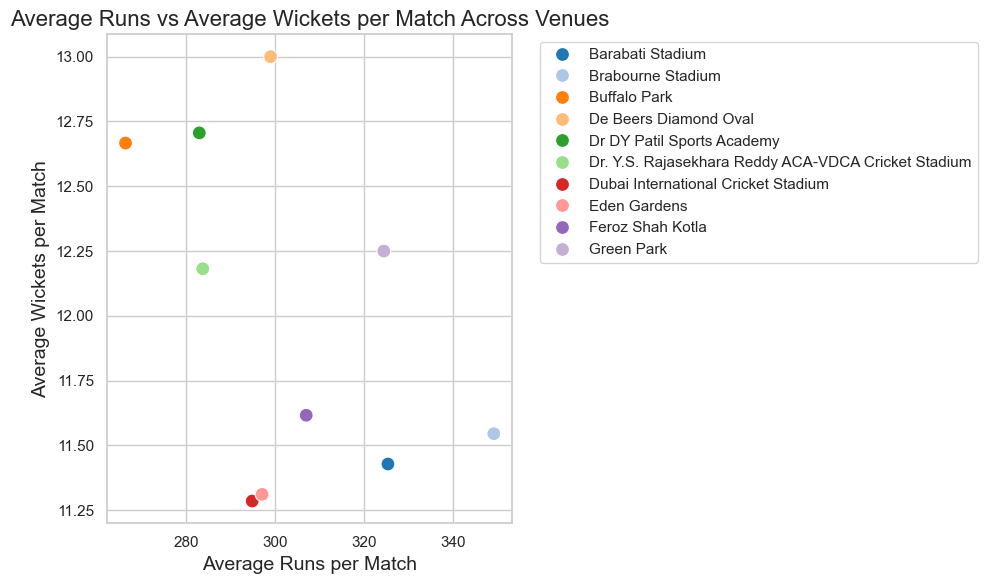

In [153]:
# Visualization: Scatter Plot for Average Runs vs Average Wickets
plt.figure(figsize=(10, 6))
sns.scatterplot(x='avg_runs_per_match', y='avg_wickets_per_match', hue='venue', data=venue_avg_stats.head(10), palette='tab20', s=100)
plt.title('Average Runs vs Average Wickets per Match Across Venues', fontsize=16)
plt.xlabel('Average Runs per Match', fontsize=14)
plt.ylabel('Average Wickets per Match', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Insights:
From the graph we can see that <b>Diamond Oval Stadium</b> has an <b>average runs per match of 300</b> and 
<b>average wickets per match is around 13</b>

## 19. Is there a significant difference in batting team performance between the first and second innings?

In [154]:
df_analysis = df[['inning', 'total_runs', 'over', 'ball', 'match_id']].copy()


df_analysis = df_analysis.groupby('inning').agg(
    total_runs=('total_runs', 'sum'),
    total_balls=('ball', 'count')
).reset_index()

df_analysis['runrate'] = round((df_analysis['total_runs']/df_analysis['total_balls'])*6,2)

In [155]:
# Separate the data into first and second innings
first_innings = df_analysis[df_analysis['inning'] == 1]
second_innings = df_analysis[df_analysis['inning'] == 2]

# Calculate total runs for each innings
total_runs_first = first_innings['total_runs']
total_runs_second = second_innings['total_runs']

# Display the average run rates and total runs
print(f'Average Run Rate - First Innings: {first_innings['runrate'].values}')
print(f'Average Run Rate - Second Innings: {second_innings['runrate'].values}')
print(f'Total Runs - First Innings: {total_runs_first.values}')
print(f'Total Runs - Second Innings: {total_runs_second.values}')

Average Run Rate - First Innings: [7.81]
Average Run Rate - Second Innings: [7.68]
Total Runs - First Innings: [101547]
Total Runs - Second Innings: [92594]


### Insights:
There is no much significant change in first and second innings scorings

## 20. Analyze how the average win by runs has changed across seasons. Is there a trend towards higher or lower scoring matches?

In [156]:
df_analysis = df[['season', 'win_by_runs', 'result']].copy()

# Filter matches where the result is a win by runs (win_by_runs > 0)
df_analysis = df_analysis[df_analysis['win_by_runs'] > 0]

# Group by season and calculate the average win by runs
seasonal_avg_win_by_runs = df_analysis.groupby('season')['win_by_runs'].mean().reset_index(name='avg_win_by_runs')

In [157]:
seasonal_avg_win_by_runs

,season,avg_win_by_runs
0,2008,29.711351
1,2009,27.459077
2,2010,31.167037
3,2011,32.937461
4,2012,28.013867
5,2013,33.519537
6,2014,28.899108
7,2015,26.089247
8,2016,31.306348
9,2017,28.828192


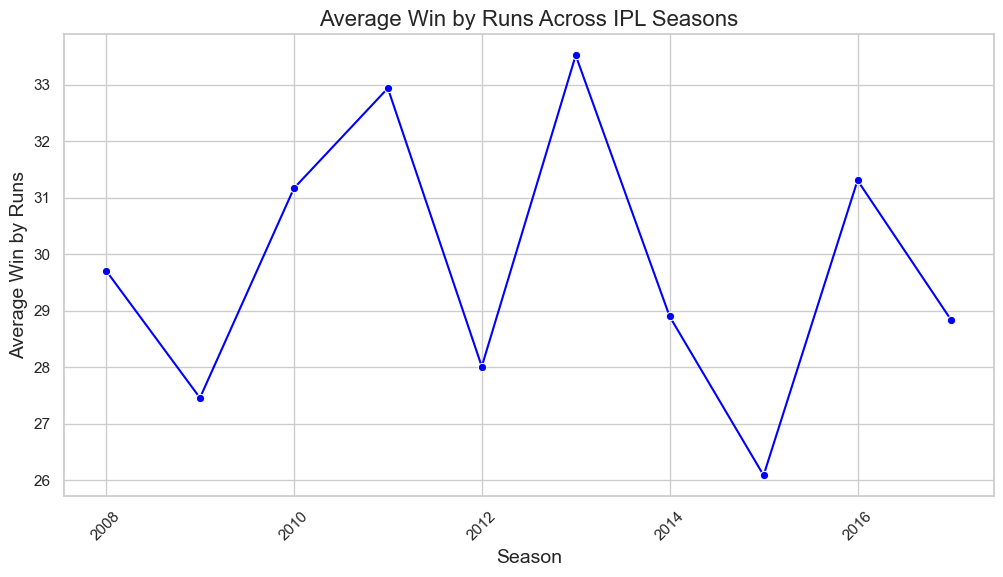

In [158]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='season', y='avg_win_by_runs', data=seasonal_avg_win_by_runs, marker='o', color='blue')
plt.title('Average Win by Runs Across IPL Seasons', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Average Win by Runs', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### Insights :
Trend Over Time: The average win margin by runs has fluctuated over the seasons. <br>
It peaked at 31 runs in one season and dropped to 20 runs in another.